### Introduction

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter.

On the basis of the applicant's profile, the company should be able to tell if the applicant is likely to repay the loan or not. This could be made possible by establishing key predictor variables within the given dataset which can in turn be used to aid decision making by the company on granting the loans to its clients.

This will help the company to grant loans to clients who are likely not to default and deny those who are likely to default.


### Analysis on Application Dataset

In [1]:
#importing data from CSV file into pandas dataframe

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
    
app_data = pd.read_csv('application_data.csv')
app_data.head(20)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
1       100003       0         Cash loans           F            N   
2       100004       0    Revolving loans           M            Y   
3       100006       0         Cash loans           F            N   
4       100007       0         Cash loans           M            N   
5       100008       0         Cash loans           M            N   
6       100009       0         Cash loans           F            Y   
7       100010       0         Cash loans           M            Y   
8       100011       0         Cash loans           F            N   
9       100012       0    Revolving loans           M            N   
10      100014       0         Cash loans           F            N   
11      100015       0         Cash loans           F            N   
12      100016       0         Cash loans           F            N   
13      100017       0         Cash loans           M            Y   
14      100018       0         Cash loans           F            N   
15      100019       0         Cash loans           M            Y   
16      100020       0         Cash loans           M            N   
17      100021       0    Revolving loans           F            N   
18      100022       0    Revolving loans           F            N   
19      100023       0         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0        202500.000    406597.5      24700.5   
1                N             0        270000.000   1293502.5      35698.5   
2                Y             0         67500.000    135000.0       6750.0   
3                Y             0        135000.000    312682.5      29686.5   
4                Y             0        121500.000    513000.0      21865.5   
5                Y             0         99000.000    490495.5      27517.5   
6                Y             1        171000.000   1560726.0      41301.0   
7                Y             0        360000.000   1530000.0      42075.0   
8                Y             0        112500.000   1019610.0      33826.5   
9                Y             0        135000.000    405000.0      20250.0   
10               Y             1        112500.000    652500.0      21177.0   
11               Y             0         38419.155    148365.0      10678.5   
12               Y             0         67500.000     80865.0       5881.5   
13               N             1        225000.000    918468.0      28966.5   
14               Y             0        189000.000    773680.5      32778.0   
15               Y             0        157500.000    299772.0      20160.0   
16               N             0        108000.000    509602.5      26149.5   
17               Y             1         81000.000    270000.0      13500.0   
18               Y             0        112500.000    157500.0       7875.0   
19               Y             1         90000.000    544491.0      17563.5   

    ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0   ...                 0                0                0                0   
1   ...                 0                0                0                0   
2   ...                 0                0                0                0   
3   ...                 0                0                0                0   
4   ...                 0                0                0                0   
5   ...                 0                0                0                0   
6   ...                 0                0                0                0   
7   ...                 0                0                0                0   
8   ...                 0                0                0                0   
9   ...                 0                0                0              

In [2]:
#to view large outputs
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
print(app_data.shape)
print(app_data.info())

(307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


In [4]:
app_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  104582.000000  307511.000000   307511.000000    307511.000000     307511.000000  307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000  134133.000000  3.068510e+05  246546.000000    151450.00000     127568.000000                157504.000000    103023.000000    92646.000000  143620.000000  152683.000000  154491.000000   98869.000000  124921.000000          97312.000000   153161.000000             93997.000000      137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   
mean   278180.518577       0.080729       0.417052      1.687979e+05  5.990260e+05   27108.573909     5.383962e+05                    0.020868  -16036.995067   63815.045904       -4986.120328     -2994.202373      12.061091       0.999997        0.819889         0.199368          0.998133       0.281066       0.056720         2.152665              2.052463                     2.031521                12.063419                    0.015144                    0.050769                     0.040659                0.078173                0.230454                 0.179555       0.502130  5.143927e-01       0.510853         0.11744          0.088442                     0.977735         0.752471        0.044621       0.078942       0.149725       0.226282       0.231894       0.066333              0.100775        0.107399                 0.008809           0.028358         0.114231           0.087543                      0.977065          0.759637         0.042553        0.074490   
std    102790.175348       0.272419       0.722121      2.371231e+05  4.024908e+05   14493.737315     3.694465e+05                    0.013831    4363.988632  141275.766519        3522.886321      1509.450419      11.944812       0.001803        0.384280         0.399526          0.043164       0.449521       0.231307         0.910682              0.509034                     0.502737                 3.265832                    0.122126                    0.219526                     0.197499                0.268444                0.421124                 0.383817       0.211062  1.910602e-01       0.194844         0.10824          0.082438                     0.059223         0.113280        0.076036       0.134576       0.100049       0.144641       0.161380       0.081184              0.092576        0.110565                 0.047732           0.069523         0.107936           0.084307                      0.064575          0.110111         0.074445        0.132256   
min    100002.000000       0.000000       0.000000      2.

In [5]:
(100*app_data.isnull().sum()/len(app_data)).round(2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [6]:
app_data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0           100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369   
1           100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family         State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291          NaN           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.311267      0.622246           NaN          0.0959            0.0529                       0.9851           0.7960          0.0605           0.08         0.0345         0.2917         0.3333        0.0130   
2           100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531         26.0           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government           NaN      0.555912      0.729567             NaN               NaN                          NaN              NaN             NaN            NaN            NaN            NaN            NaN           NaN   
3           100006       0  

### Data Cleaning

In [7]:
empty=app_data.isnull().sum()
null_percent = (app_data.isnull().sum()/app_data.isnull().count()*100)
unique_val = app_data.nunique()
datatypes = app_data.dtypes

pd.concat([empty, null_percent, unique_val, datatypes], axis=1, keys=['Null_count', 'Null_Percent', 'Unique', 'Data_Type']).sort_values(by="Null_Percent", ascending=False)

Null_count  Null_Percent  Unique Data_Type
COMMONAREA_MEDI                   214865     69.872297    3202   float64
COMMONAREA_AVG                    214865     69.872297    3181   float64
COMMONAREA_MODE                   214865     69.872297    3128   float64
NONLIVINGAPARTMENTS_MODE          213514     69.432963     167   float64
NONLIVINGAPARTMENTS_AVG           213514     69.432963     386   float64
NONLIVINGAPARTMENTS_MEDI          213514     69.432963     214   float64
FONDKAPREMONT_MODE                210295     68.386172       4    object
LIVINGAPARTMENTS_MODE             210199     68.354953     736   float64
LIVINGAPARTMENTS_AVG              210199     68.354953    1868   float64
LIVINGAPARTMENTS_MEDI             210199     68.354953    1097   float64
FLOORSMIN_AVG                     208642     67.848630     305   float64
FLOORSMIN_MODE                    208642     67.848630      25   float64
FLOORSMIN_MEDI                    208642     67.848630      47   float64
YEARS_BUILD_MEDI                  204488     66.497784     151   float64
YEARS_BUILD_MODE                  204488     66.497784     154   float64
YEARS_BUILD_AVG                   204488     66.497784     149   float64
OWN_CAR_AGE                       202929     65.990810      62   float64
LANDAREA_MEDI                     182590     59.376738    3560   float64
LANDAREA_MODE                     182590     59.376738    3563   float64
LANDAREA_AVG                      182590     59.376738    3527   float64
BASEMENTAREA_MEDI                 179943     58.515956    3772   float64
BASEMENTAREA_AVG                  179943     58.515956    3780   float64
BASEMENTAREA_MODE                 179943     58.515956    3841   float64
EXT_SOURCE_1                      173378     56.381073  114584   float64
NONLIVINGAREA_MODE                169682     55.179164    3327   float64
NONLIVINGAREA_AVG                 169682     55.179164    3290   float64
NONLIVINGAREA_MEDI                169682     55.179164    3323   float64
ELEVATORS_MEDI                    163891     53.295980      46   float64
ELEVATORS_AVG                     163891     53.295980     257   float64
ELEVATORS_MODE                    163891     53.295980      26   float64
WALLSMATERIAL_MODE                156341     50.840783       7    object
APARTMENTS_MEDI                   156061     50.749729    1148   float64
APARTMENTS_AVG                    156061     50.749729    2339   float64
APARTMENTS_MODE                   156061     50.749729     760   float64
ENTRANCES_MEDI                    154828     50.348768      46   float64
ENTRANCES_AVG                     154828     50.348768     285   float64
ENTRANCES_MODE                    154828     50.348768      30   float64
LIVINGAREA_AVG                    154350     50.193326    5199   float64
LIVINGAREA_MODE                   154350     50.193326    5301   float64
LIVINGAREA_MEDI                   154350     50.193326    5281   float64
HOUSETYPE_MODE                    154297     50.176091       3    object
FLOORSMAX_MODE                    153020     49.760822      25   float64
FLOORSMAX_MEDI                    153020     49.760822      49   float64
FLOORSMAX_AVG                     153020     49.760822     403   float64
YEARS_BEGINEXPLUATATION_MODE      150007     48.781019     221   float64
YEARS_BEGINEXPLUATATION_MEDI      150007     48.781019     245   float64
YEARS_BEGINEXPLUATATION_AVG       150007     48.781019     285   float64
TOTALAREA_MODE                    148431     48.268517    5116   float64
EMERGENCYSTATE_MODE               145755     47.398304       2    object
OCCUPATION_TYPE                    96391     31.345545      18    object
EXT_SOURCE_3                       60965     19.825307     814   float64
AMT_REQ_CREDIT_BUREAU_HOUR         41519     13.501631       5   float64
AMT_REQ_CREDIT_BUREAU_DAY          41519     13.501631       9   float64
AMT_REQ_CREDIT_BUREAU_WEEK         41519     13.501631       9   float64
AMT_REQ_CREDIT_

In [8]:
app_null_percent =pd.concat([empty, null_percent, unique_val, datatypes], axis=1, keys=['Null_count', 'Null_Percent', 'Unique', 'Data_Type']).sort_values(by="Null_Percent", ascending=False)

In [9]:


list(app_null_percent[app_null_percent.Null_Percent <57].index)

['EXT_SOURCE_1',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'APARTMENTS_MODE',
 'ENTRANCES_MEDI',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'HOUSETYPE_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_AVG',
 'TOTALAREA_MODE',
 'EMERGENCYSTATE_MODE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_3',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'NAME_TYPE_SUITE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'CNT_FAM_MEMBERS',
 'DAYS_LAST_PHONE

In [10]:
required_index=list(app_null_percent[app_null_percent.Null_Percent <57].index)
app_data=app_data[required_index]
app_data.describe()

EXT_SOURCE_1  NONLIVINGAREA_MODE  NONLIVINGAREA_AVG  NONLIVINGAREA_MEDI  ELEVATORS_MEDI  ELEVATORS_AVG  ELEVATORS_MODE  APARTMENTS_MEDI  APARTMENTS_AVG  APARTMENTS_MODE  ENTRANCES_MEDI  ENTRANCES_AVG  ENTRANCES_MODE  LIVINGAREA_AVG  LIVINGAREA_MODE  LIVINGAREA_MEDI  FLOORSMAX_MODE  FLOORSMAX_MEDI  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG  TOTALAREA_MODE   EXT_SOURCE_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  EXT_SOURCE_2  AMT_GOODS_PRICE    AMT_ANNUITY  CNT_FAM_MEMBERS  DAYS_LAST_PHONE_CHANGE   CNT_CHILDREN  FLAG_DOCUMENT_8  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_9  FLAG_DOCUMENT_21  FLAG_DOCUMENT_10  \
count  134133.000000       137829.000000      137829.000000       137829.000000   143620.000000  143620.000000   143620.000000    151450.000000    151450.00000    151450.000000   152683.000000  152683.000000   152683.000000   153161.000000    153161.000000    153161.000000   154491.000000   154491.000000  154491.000000                 157504.000000                 157504.000000                157504.000000   159080.000000  246546.000000               265992.000000              265992.000000               265992.000000              265992.000000              265992.000000               265992.000000             306490.000000             306490.000000             306490.000000             306490.000000  3.068510e+05     3.072330e+05  307499.000000    307509.000000           307510.000000  307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000     307511.000000     307511.000000   
mean        0.502130            0.027022           0.028358            0.028236        0.078078       0.078942        0.074490         0.117850         0.11744         0.114231        0.149213       0.149725        0.145193        0.107399         0.105975         0.108607        0.222315        0.225897       0.226282                      0.977065                      0.977752                     0.977735        0.102547       0.510853                    0.006402                   0.007000                    0.034362                   0.267395                   0.265474                    1.899974                  1.422245                  0.143421                  1.405292                  0.100049  5.143927e-01     5.383962e+05   27108.573909         2.152665             -962.858788       0.417052         0.081376         0.000042         0.710023         0.000081         0.015115         0.088055         0.000192         0.003896          0.000335          0.000023   
std         0.211062            0.070254           0.069523            0.070166        0.134467       0.134576        0.132256         0.109076         0.10824         0.107936        0.100368       0.100049        0.100977        0.110565         0.111845         0.112260        0.143709        0.145067       0.144641                      0.064575                      0.059897                     0.059223        0.107462       0.194844                    0.083849                   0.110757                    0.204685                   0.916002                   0.794056                    1.869295                  2.400989                  0.446698                  2.379803                  0.362291  1.910602e-01     3.694465e+05   14493.737315         0.910682              826.808487       0.722121         0.273412         0.006502         0.453752         0.009016         0.122010         0.283376         0.013850         0.062295          0.018299          0.004771   
min         0.014568            0.000000           0.000000 

Checking Distribution of Target Variable

In [11]:
defaulter=app_data[app_data.TARGET==1]
non_defaulter =app_data[app_data.TARGET==0]


In [12]:
sns.countplot(app_data.TARGET)
plt.xlabel("TARGET")
plt.ylabel("Count of TARGET")
plt.title("Distribution of TARGET Variable")
plt.show()

In [13]:
(len(defaulter)*100)/len(app_data)

8.072881945686495

In [14]:
(len(non_defaulter)*100)/len(app_data)

91.92711805431351

In [15]:
round(len(non_defaulter)/len(defaulter),2)

11.39

We can see from above boxplot that dataset is majorly imbalanced  . Loan repaid on time percentage is on higher side(92%,more than 25000 paid on time) and ess than 5000 loans were not repaid(8.07).

Data imbalance ratio can also measured which comes around 11.39%

Finding the low null percent dataset and doing the necessary treatment required

In [16]:
#Checking columns with  missing values percent in range of 0 to 15

app_null_percent[(app_null_percent.Null_Percent>0) & (app_null_percent.Null_Percent<15)]

Null_count  Null_Percent  Unique Data_Type
AMT_REQ_CREDIT_BUREAU_HOUR       41519     13.501631       5   float64
AMT_REQ_CREDIT_BUREAU_DAY        41519     13.501631       9   float64
AMT_REQ_CREDIT_BUREAU_WEEK       41519     13.501631       9   float64
AMT_REQ_CREDIT_BUREAU_MON        41519     13.501631      24   float64
AMT_REQ_CREDIT_BUREAU_QRT        41519     13.501631      11   float64
AMT_REQ_CREDIT_BUREAU_YEAR       41519     13.501631      25   float64
NAME_TYPE_SUITE                   1292      0.420148       7    object
OBS_30_CNT_SOCIAL_CIRCLE          1021      0.332021      33   float64
DEF_30_CNT_SOCIAL_CIRCLE          1021      0.332021      10   float64
OBS_60_CNT_SOCIAL_CIRCLE          1021      0.332021      33   float64
DEF_60_CNT_SOCIAL_CIRCLE          1021      0.332021       9   float64
EXT_SOURCE_2                       660      0.214626  119831   float64
AMT_GOODS_PRICE                    278      0.090403    1002   float64
AMT_ANNUITY                         12      0.003902   13672   float64
CNT_FAM_MEMBERS                      2      0.000650      17   float64
DAYS_LAST_PHONE_CHANGE               1      0.000325    3773   float64

In [18]:
low_miss_percent = app_null_percent[(app_null_percent.Null_Percent>0) & (app_null_percent.Null_Percent<15)]

low_miss_percent

Null_count  Null_Percent  Unique Data_Type
AMT_REQ_CREDIT_BUREAU_HOUR       41519     13.501631       5   float64
AMT_REQ_CREDIT_BUREAU_DAY        41519     13.501631       9   float64
AMT_REQ_CREDIT_BUREAU_WEEK       41519     13.501631       9   float64
AMT_REQ_CREDIT_BUREAU_MON        41519     13.501631      24   float64
AMT_REQ_CREDIT_BUREAU_QRT        41519     13.501631      11   float64
AMT_REQ_CREDIT_BUREAU_YEAR       41519     13.501631      25   float64
NAME_TYPE_SUITE                   1292      0.420148       7    object
OBS_30_CNT_SOCIAL_CIRCLE          1021      0.332021      33   float64
DEF_30_CNT_SOCIAL_CIRCLE          1021      0.332021      10   float64
OBS_60_CNT_SOCIAL_CIRCLE          1021      0.332021      33   float64
DEF_60_CNT_SOCIAL_CIRCLE          1021      0.332021       9   float64
EXT_SOURCE_2                       660      0.214626  119831   float64
AMT_GOODS_PRICE                    278      0.090403    1002   float64
AMT_ANNUITY                         12      0.003902   13672   float64
CNT_FAM_MEMBERS                      2      0.000650      17   float64
DAYS_LAST_PHONE_CHANGE               1      0.000325    3773   float64

For the  treatment of columns mentioned below having  missing values, we understand this are the columns regarding timelines when the enquires are made to the credit bureau before the application is processed 

AMT_REQ_CREDIT_BUREAU_HOUR,
AMT_REQ_CREDIT_BUREAU_DAY,
AMT_REQ_CREDIT_BUREAU_WEEK,
AMT_REQ_CREDIT_BUREAU_MON,
AMT_REQ_CREDIT_BUREAU_QRT,
AMT_REQ_CREDIT_BUREAU_YEAR

Imputing missing values in these columns can be done with 0s assuming  that no enquiry was made during the different timelines having in null values.

For the columns below :

NAME_TYPE_SUITE, 
OBS_30_CNT_SOCIAL_CIRCLE & related fields.
EXT_SOURCE_2,
AMT_GOODS_PRICE,
CNT_FAM_MEMBERS,
AMT_ANNUITY,
DAYS_LAST_PHONE_CHANGE,

On checking the columns we can see that imputing this might skew the dataset and we might end up exaggerating the data as this column values
are not at all relatable and can take any values using mean of this columns to impute would not help and hence  we should leave the null in this as it is 

In [19]:
app_data.select_dtypes('object').columns

Index(['WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE', 'OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE'], dtype='object')

In [20]:
app_data.select_dtypes('float64').columns

Index(['EXT_SOURCE_1', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 'REGION_POPULATION_RELATIVE'], dtype='object')

In [21]:
app_data.select_dtypes('int64').columns

Index(['CNT_CHILDREN', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_12', 'FLAG_PHONE', 'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'TARGET', 'REG_CITY_NOT_LIVE_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION', 'HOUR_APPR_PROCESS_START', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'FLAG_EMAIL', 'FLAG_CONT_MOBILE', 'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'SK_ID_CURR'], dtype='object')

 From above we can see lot of the integer columns are some form of Flags(0,1) values, we can verify by checking the unique value counts

In [22]:
app_data.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

CNT_CHILDREN                       15
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_9                     2
FLAG_DOCUMENT_21                    2
FLAG_DOCUMENT_10                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_13                    2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_15                    2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_17                    2
FLAG_DOCUMENT_18                    2
FLAG_DOCUMENT_19                    2
FLAG_DOCUMENT_20                    2
FLAG_DOCUMENT_12                    2
FLAG_PHONE                          2
LIVE_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_WORK_CITY              2
TARGET                              2
REG_CITY_NOT_LIVE_CITY              2
LIVE_REGION_

From above we can see lot of "int" columns have 2 unique values. These are flags or Flag type variables.which we cannot use in bivariate analysis. These can be converted to Yes/No values for categorical analysis.

In [23]:
app_null_percent[(app_null_percent.Unique==2)&(app_null_percent.Data_Type=="int64")].index

Index(['FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_12', 'FLAG_PHONE', 'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'TARGET', 'REG_CITY_NOT_LIVE_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION', 'FLAG_EMAIL', 'FLAG_CONT_MOBILE', 'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL'], dtype='object')

In [24]:
#columns to convert

convert_col=app_null_percent[(app_null_percent.Unique==2)&(app_null_percent.Data_Type=="int64")].index

In [26]:
for i in convert_col:
    app_data.loc[:,i].replace((0, 1), ('N', 'Y'), inplace=True)

In [27]:
app_data.TARGET

0         Y
1         N
2         N
3         N
4         N
         ..
307506    N
307507    N
307508    N
307509    Y
307510    N
Name: TARGET, Length: 307511, dtype: object

In [33]:
#We need to convert TARGET values back to 0,1 for our analysis

app_data.TARGET.replace(('N', 'Y'), (0, 1), inplace=True)
app_data.dtypes.value_counts()

object     47
float64    43
int64       9
dtype: int64

# Univariate Analysis on Categorical Columns

We need to find all object columns and then carry out the necessary and essential categories and do the univariate anaylsis one by one   

In [34]:
defaulter=app_data[app_data.TARGET==1]
non_defaulter =app_data[app_data.TARGET==0]


In [35]:
app_data.select_dtypes('object').columns

Index(['WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE', 'OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'FLAG_DOCUMENT_8', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_OWN_REALTY', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_12', 'FLAG_PHONE', 'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_EMAIL', 'FLAG_CONT_MOBILE', 'ORGANIZATION_TYPE', 'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE'], dtype='object')

In [36]:
#defining a Function that can be called again and again to plot so that it helps to ease our analysis .

def plot_chart(var,label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15,20))
    
    d1=sns.countplot(ax=ax1,x=defaulter[var], data=defaulter, order= defaulter[var].value_counts().index)
    ax1.set_title('Distribution of '+ '%s' %var +' for Defaulters', fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        d1.set_xticklabels(d1.get_xticklabels(),rotation=90)
    d2=sns.countplot(ax=ax2,x=non_defaulter[var], data=non_defaulter, order= non_defaulter[var].value_counts().index)
    if(label_rotation):
        d2.set_xticklabels(d2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title('Distribution of '+ '%s' %var +' for Non-Defaulters', fontsize=10)
    plt.show()


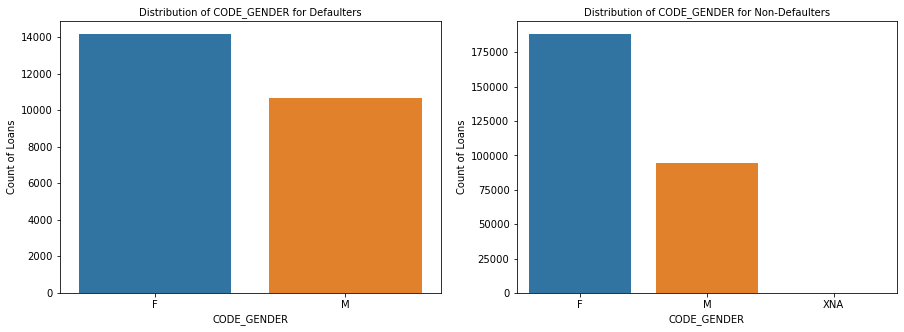

In [37]:
plot_chart('CODE_GENDER', label_rotation=False,horizontal_layout=True)


In [38]:
#We can observe some XNA values for gender we can replace that with F as that is mean value
app_data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [41]:
app_data.CODE_GENDER = app_data.CODE_GENDER.apply(lambda x : x.replace('XNA','F') )


In [40]:
app_data.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

We observe that the number of Females taking loans is much higher than the number of Males for both Target = 0 and Target = 1

In [42]:
app_data.ORGANIZATION_TYPE.describe()


count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [48]:
app_data.ORGANIZATION_TYPE.value_counts()
#We can see that there are high number of XNA values imputing them can skew data so we need to drop them from the total

app_data=app_data[~(app_data.ORGANIZATION_TYPE=='XNA')]

In [49]:
app_data.ORGANIZATION_TYPE.value_counts().head()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Name: ORGANIZATION_TYPE, dtype: int64

In [50]:
app_data.ORGANIZATION_TYPE.value_counts().tail()

Religion             85
Industry: type 13    67
Trade: type 4        64
Trade: type 5        49
Industry: type 8     24
Name: ORGANIZATION_TYPE, dtype: int64

In [51]:
defaulter=app_data[app_data.TARGET==1]
non_defaulter =app_data[app_data.TARGET==0]

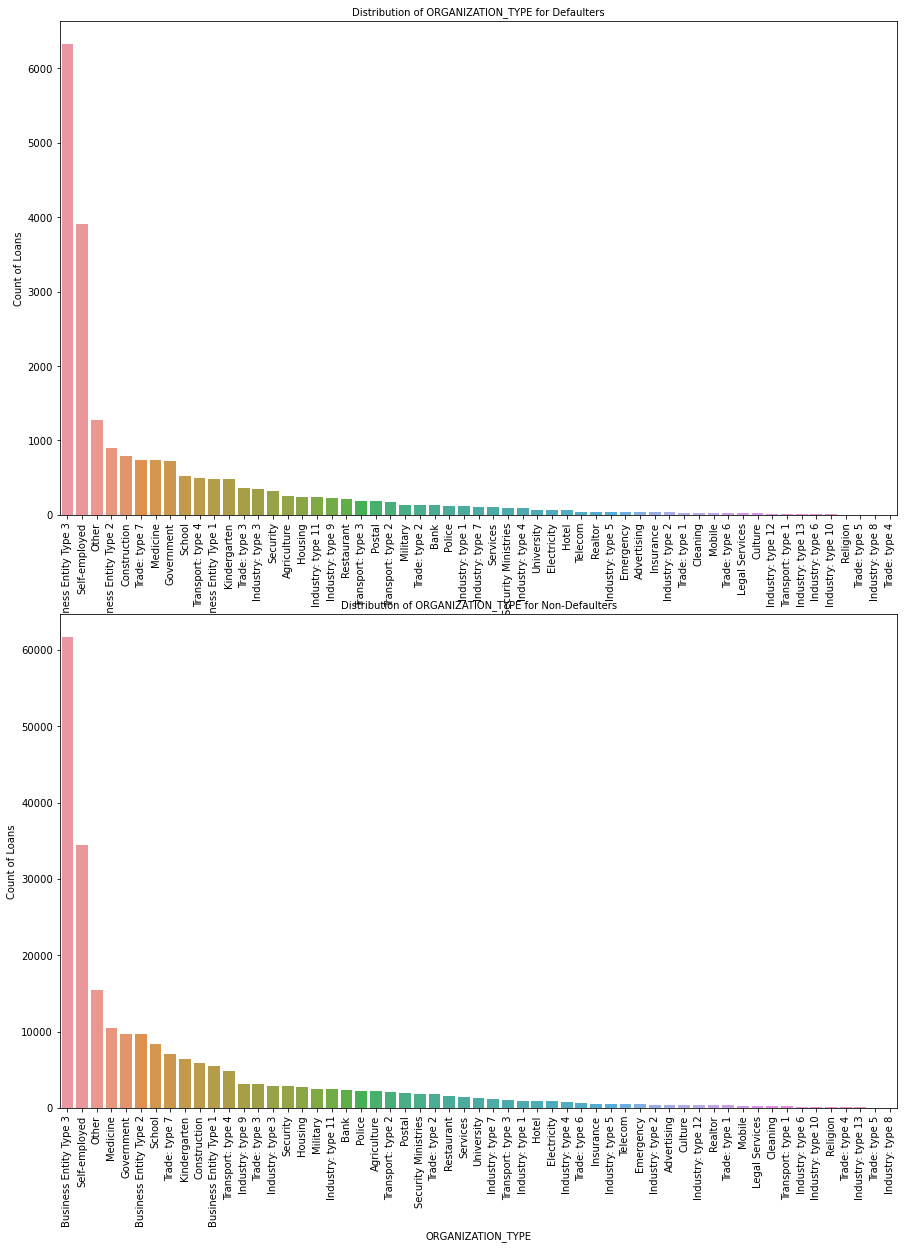

In [52]:
plot_chart('ORGANIZATION_TYPE', label_rotation=True,horizontal_layout=False)

Observation from above is that high counts foror both the cases is for Business Entity type 3 and Self Employed  people and on the lower side are the people who are related to religion,trade and industry with different lower grades 

In [53]:
app_data.NAME_CONTRACT_TYPE.value_counts()

Cash loans         226224
Revolving loans     25913
Name: NAME_CONTRACT_TYPE, dtype: int64

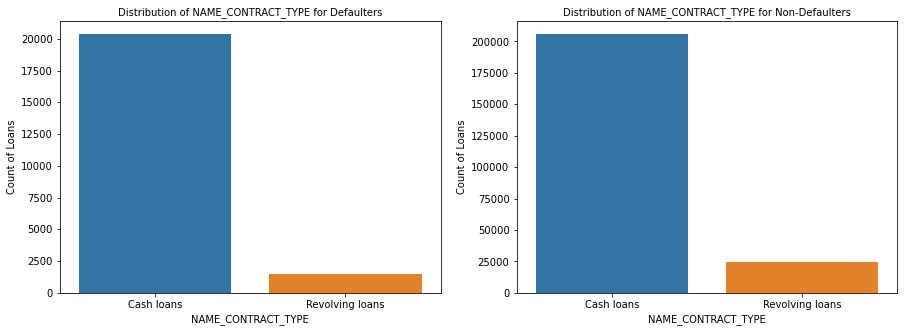

In [54]:
plot_chart('NAME_CONTRACT_TYPE', label_rotation=False,horizontal_layout=True)

We observe that the number of Cash loans is much higher than the number of Revolving loans for both Target = 0 and Target = 1

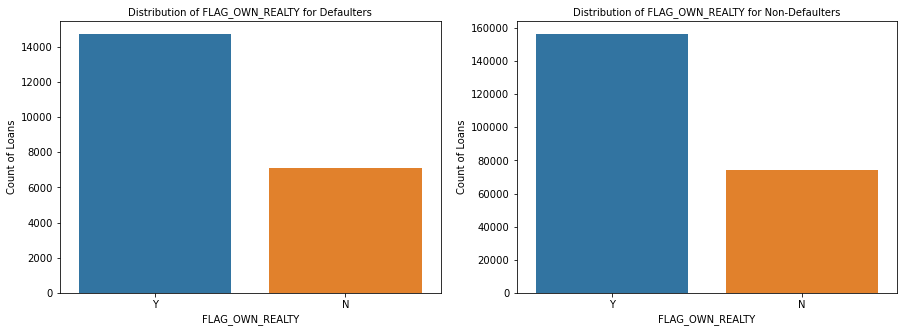

In [55]:
plot_chart('FLAG_OWN_REALTY', label_rotation=False,horizontal_layout=True)


We see that for both the target values people who own reality have higher counts compared to who dont own a reality

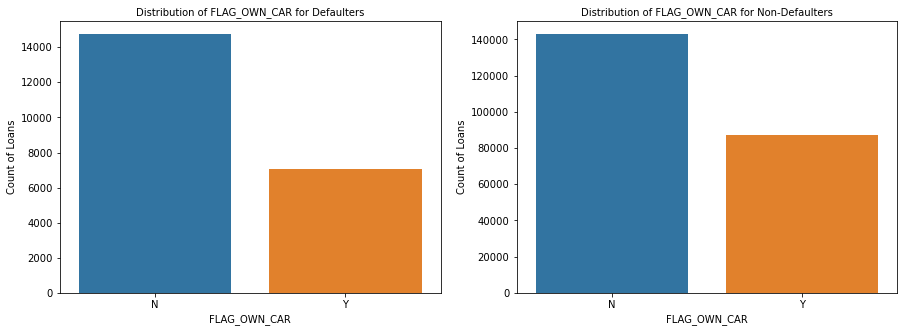

In [56]:
plot_chart('FLAG_OWN_CAR', label_rotation=False,horizontal_layout=True)

In the case of owning a car we can see that those who dont own have higher count in both the target cases compared to one's who do have 

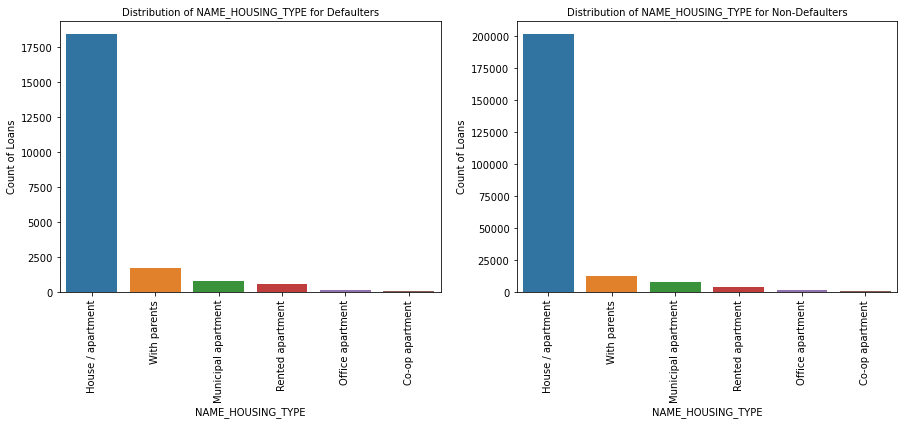

In [57]:
plot_chart('NAME_HOUSING_TYPE', label_rotation=True,horizontal_layout=True)

Observation for the housing type is :

Most people live in a House/Apartment have higher values for defaulting and non_defaulting ,co-op aparatment have the least count

Ratio of People who live With Parents is slightly higher for defaulter than non-defaulters. It tells us that applicant who live with parents have a higher chance of having payment difficulties.


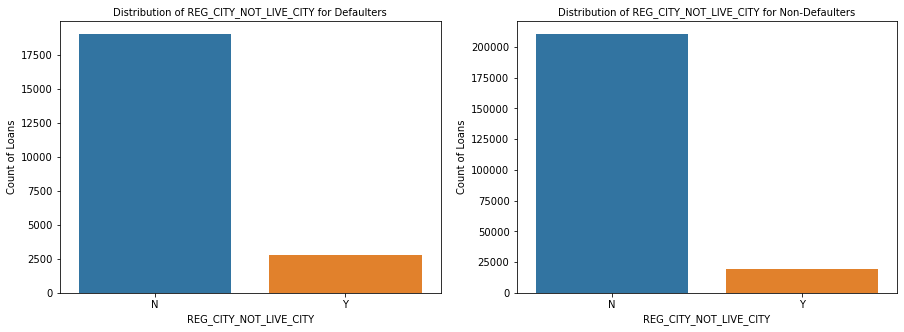

In [58]:
plot_chart('REG_CITY_NOT_LIVE_CITY', label_rotation=False,horizontal_layout=True)

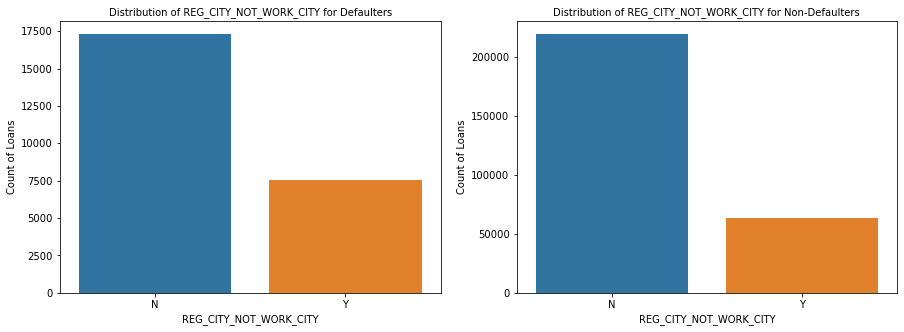

In [125]:
plot_chart('REG_CITY_NOT_WORK_CITY', label_rotation=False,horizontal_layout=True)

We observe that the Ratio of people whose Registration City is not the same as live city or work city is higher in case of defaulters are compared to defaulters.

It tells us that people who live or work in a city different than the registration city are more likely to have payment difficulties

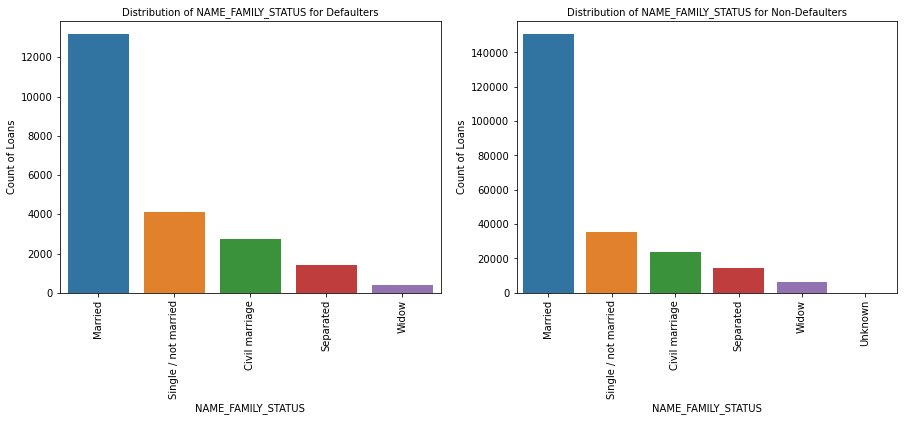

In [59]:
plot_chart('NAME_FAMILY_STATUS', label_rotation=True,horizontal_layout=True)


Ratio of Single/Unmarried people is more in the left graph.

Single/Unmarried people are more likely to have payment difficulties

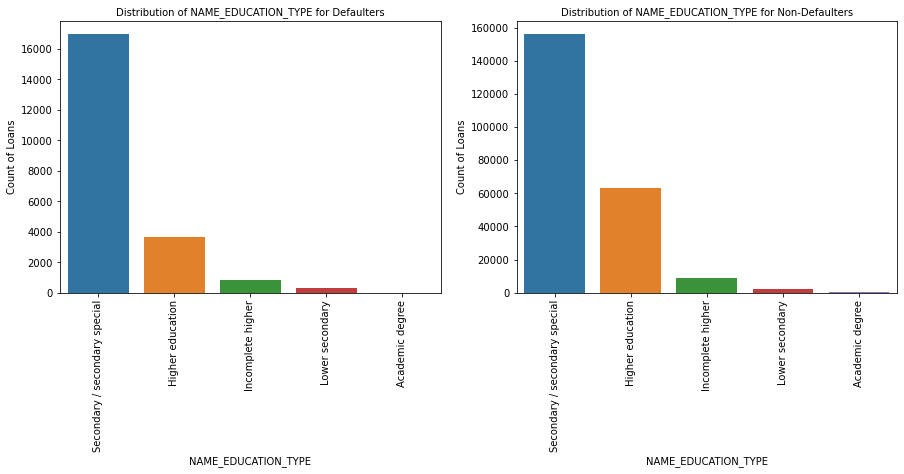

In [60]:
plot_chart('NAME_EDUCATION_TYPE', label_rotation=True,horizontal_layout=True)

While the category with highest count remains same.(Secondary/secondary special)

This chart tells us that people with Academic Degree rarely take loans and are rarely defaulters. So they are potentially good customers.
People with higher education are less likely to have payment difficulties. The Ratio is higher for non-defaulters than defaulters.

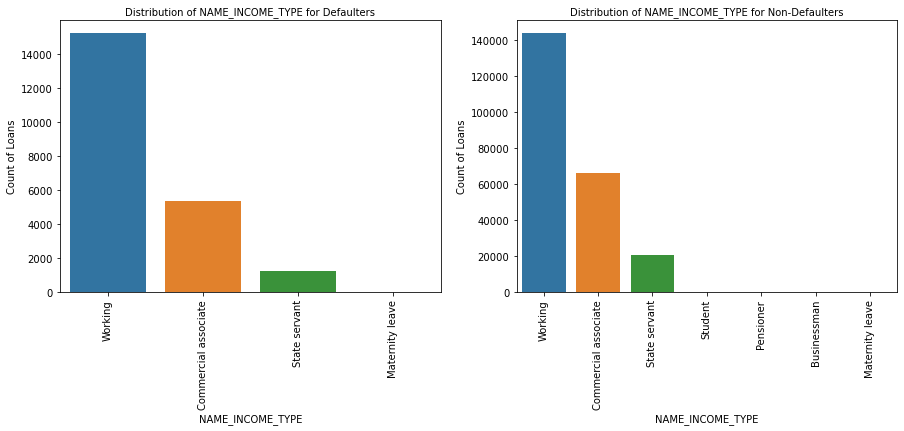

In [61]:
plot_chart('NAME_INCOME_TYPE', label_rotation=True,horizontal_layout=True)

Commercial associates, Pensioner, State Servants have a higher ratio to total in non-defaulters.



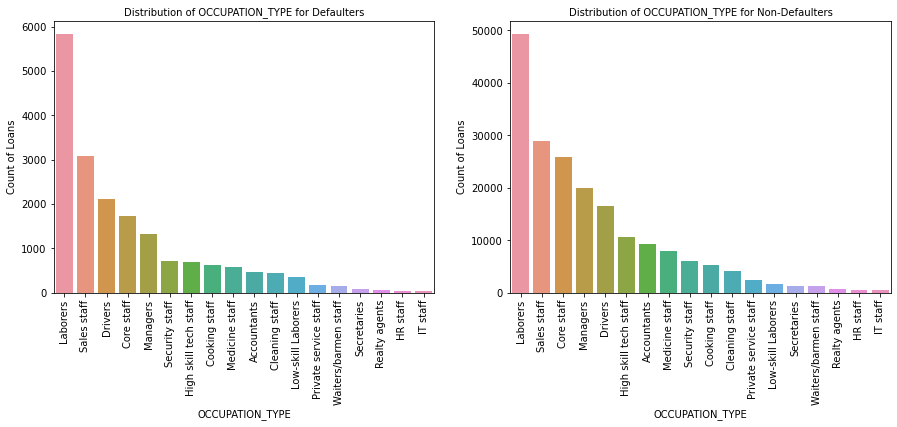

In [62]:
plot_chart('OCCUPATION_TYPE', label_rotation=True,horizontal_layout=True)

# Analysis on Numeric Columns(Univariate & Bivariate)

In [63]:
app_data.select_dtypes('float64').columns

Index(['EXT_SOURCE_1', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 'REGION_POPULATION_RELATIVE'], dtype='object')

In [131]:
app_data.select_dtypes('int64').columns

Index(['CNT_CHILDREN', 'TARGET', 'HOUR_APPR_PROCESS_START', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'SK_ID_CURR'], dtype='object')

In [64]:
## function which would help to analysis different vaiables through boxplot and histogram


def box_hist_plot(var):
    plt.figure(figsize=(20,5))
    plt.subplot(1, 2, 1)
    d=sns.boxplot(y=defaulter[var]);
    plt.title('Box Plot of '+ '%s' %var +' for Defaulter', fontsize=10)
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.subplot(1, 2, 2)
    d=plt.hist(x=defaulter[var]);
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.title('Histogram of '+ '%s' %var +' for Defaulter', fontsize=10)
plt.show()

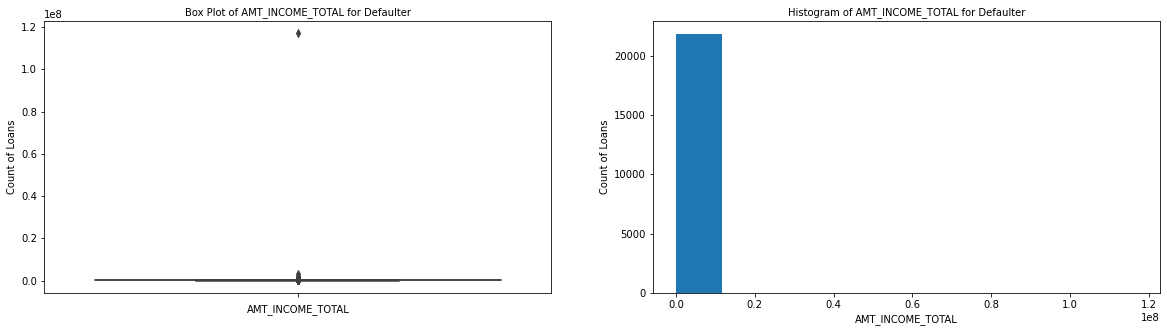

In [65]:
box_hist_plot('AMT_INCOME_TOTAL')

We can see from  above that  there are lots of outliers for amt_income_total and we need to handle them accordingly  

In [66]:
app_data.AMT_INCOME_TOTAL.quantile(1)

117000000.0

In [67]:
app_data.AMT_INCOME_TOTAL.quantile([0.99,1])

0.99       517500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

We can see that values that 99% of the values are withing the value of 517500 and hence we can removing all entries above 99 percentile

In [68]:
app_data[app_data.AMT_INCOME_TOTAL < app_data.AMT_INCOME_TOTAL.quantile(0.99)]

EXT_SOURCE_1  NONLIVINGAREA_MODE  NONLIVINGAREA_AVG  NONLIVINGAREA_MEDI  ELEVATORS_MEDI  ELEVATORS_AVG  ELEVATORS_MODE WALLSMATERIAL_MODE  APARTMENTS_MEDI  APARTMENTS_AVG  APARTMENTS_MODE  ENTRANCES_MEDI  ENTRANCES_AVG  ENTRANCES_MODE  LIVINGAREA_AVG  LIVINGAREA_MODE  LIVINGAREA_MEDI  HOUSETYPE_MODE  FLOORSMAX_MODE  FLOORSMAX_MEDI  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG  TOTALAREA_MODE EMERGENCYSTATE_MODE OCCUPATION_TYPE  EXT_SOURCE_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR NAME_TYPE_SUITE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  EXT_SOURCE_2  AMT_GOODS_PRICE  AMT_ANNUITY  CNT_FAM_MEMBERS  DAYS_LAST_PHONE_CHANGE  CNT_CHILDREN FLAG_DOCUMENT_8 NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_DOCUMENT_2 FLAG_DOCUMENT_3  \
0           0.083037              0.0000             0.0000              0.0000            0.00           0.00          0.0000       Stone, brick           0.0250          0.0247           0.0252          0.0690         0.0690          0.0690          0.0190           0.0198           0.0193  block of flats          0.0833          0.0833         0.0833                        0.9722                        0.9722                       0.9722          0.0149                  No        Laborers      0.139376                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0   Unaccompanied                       2.0                       2.0                       2.0                       2.0      0.262949         351000.0      24700.5              1.0                 -1134.0             0               N         Cash loans           M            N               N               Y   
1           0.311267              0.0000             0.0098              0.0100            0.08           0.08          0.0806              Block           0.0968          0.0959           0.0924          0.0345         0.0345          0.0345          0.0549           0.0554           0.0558  block of flats          0.2917          0.2917         0.2917                        0.9851                        0.9851                       0.9851          0.0714                  No      Core staff           NaN                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0          Family                       1.0                       0.0                       1.0                       0.0      0.622246        1129500.0      35698.5              2.0                  -828.0             0               N         Cash loans           F            N               N               Y   
2                NaN                 NaN                NaN                 NaN             NaN            NaN             NaN                NaN              NaN             NaN              NaN             NaN            NaN             NaN             NaN              NaN              NaN             NaN             NaN             NaN            NaN                           NaN                           NaN                          NaN             NaN                 NaN        Laborers      0.729567                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0   Unaccompanied                       0.0                       0.0                       0.0                       0.0      0.555912         135000.0       6750.0              1.0                  -815.0             0               N    Revolving loans           M            Y               N               N   
3                NaN                 NaN        

In [69]:
app_data=app_data[app_data.AMT_INCOME_TOTAL < app_data.AMT_INCOME_TOTAL.quantile(0.99)]

In [70]:
#update defaulter and non_defaulter with updated app_data
defaulter=app_data[app_data.TARGET==1] 
non_defaulter=app_data[app_data.TARGET==0]

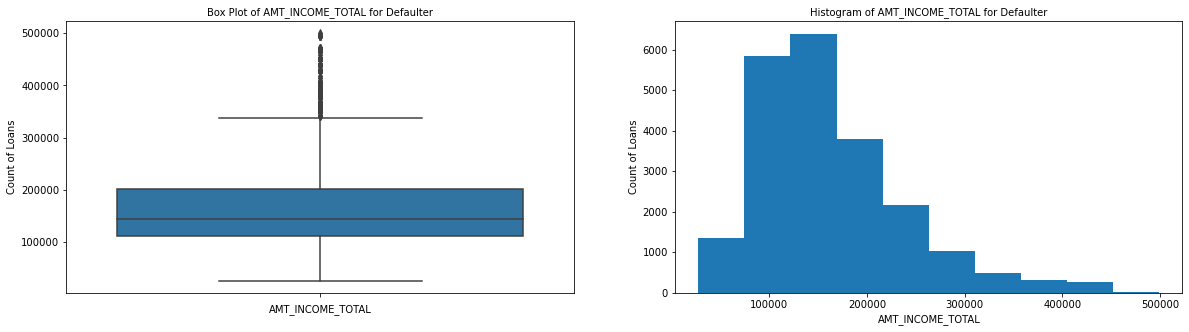

In [71]:
box_hist_plot('AMT_INCOME_TOTAL')

In [140]:
app_data.AMT_INCOME_TOTAL.describe()


count    249604.000000
mean     169655.690817
std       78807.154082
min       25650.000000
25%      112500.000000
50%      157500.000000
75%      202500.000000
max      514480.500000
Name: AMT_INCOME_TOTAL, dtype: float64

We can now see that defaulters are generally who have salary on the lower side between 100000 and 200000 with some on higher end and some on lower end

In [72]:
app_data.AMT_CREDIT.quantile([0.99,1])

0.99    1817491.5
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

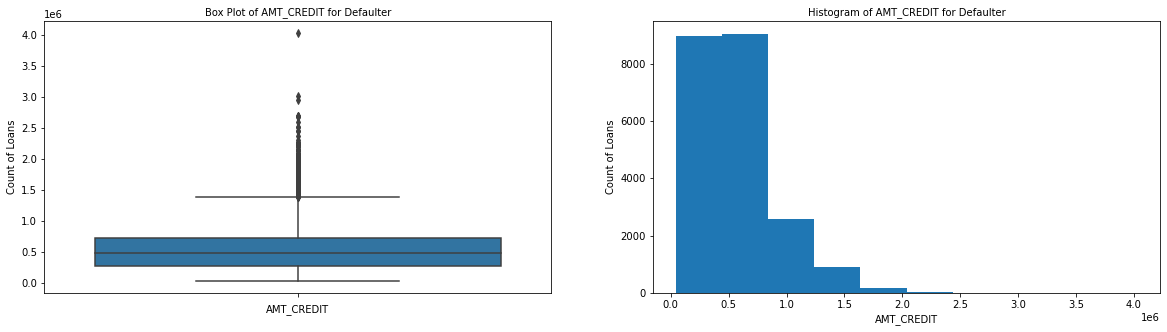

In [73]:
box_hist_plot('AMT_CREDIT')

We can see from above 99 percent values for this is within 1817491 we can remove the value above this considering it as outlier 

In [74]:
app_data[app_data.AMT_CREDIT < app_data.AMT_CREDIT.quantile(0.99)]

EXT_SOURCE_1  NONLIVINGAREA_MODE  NONLIVINGAREA_AVG  NONLIVINGAREA_MEDI  ELEVATORS_MEDI  ELEVATORS_AVG  ELEVATORS_MODE WALLSMATERIAL_MODE  APARTMENTS_MEDI  APARTMENTS_AVG  APARTMENTS_MODE  ENTRANCES_MEDI  ENTRANCES_AVG  ENTRANCES_MODE  LIVINGAREA_AVG  LIVINGAREA_MODE  LIVINGAREA_MEDI  HOUSETYPE_MODE  FLOORSMAX_MODE  FLOORSMAX_MEDI  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG  TOTALAREA_MODE EMERGENCYSTATE_MODE OCCUPATION_TYPE  EXT_SOURCE_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR NAME_TYPE_SUITE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  EXT_SOURCE_2  AMT_GOODS_PRICE  AMT_ANNUITY  CNT_FAM_MEMBERS  DAYS_LAST_PHONE_CHANGE  CNT_CHILDREN FLAG_DOCUMENT_8 NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_DOCUMENT_2 FLAG_DOCUMENT_3  \
0           0.083037              0.0000             0.0000              0.0000            0.00           0.00          0.0000       Stone, brick           0.0250          0.0247           0.0252          0.0690         0.0690          0.0690          0.0190           0.0198           0.0193  block of flats          0.0833          0.0833         0.0833                        0.9722                        0.9722                       0.9722          0.0149                  No        Laborers      0.139376                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0   Unaccompanied                       2.0                       2.0                       2.0                       2.0      0.262949         351000.0      24700.5              1.0                 -1134.0             0               N         Cash loans           M            N               N               Y   
1           0.311267              0.0000             0.0098              0.0100            0.08           0.08          0.0806              Block           0.0968          0.0959           0.0924          0.0345         0.0345          0.0345          0.0549           0.0554           0.0558  block of flats          0.2917          0.2917         0.2917                        0.9851                        0.9851                       0.9851          0.0714                  No      Core staff           NaN                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0          Family                       1.0                       0.0                       1.0                       0.0      0.622246        1129500.0      35698.5              2.0                  -828.0             0               N         Cash loans           F            N               N               Y   
2                NaN                 NaN                NaN                 NaN             NaN            NaN             NaN                NaN              NaN             NaN              NaN             NaN            NaN             NaN             NaN              NaN              NaN             NaN             NaN             NaN            NaN                           NaN                           NaN                          NaN             NaN                 NaN        Laborers      0.729567                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0   Unaccompanied                       0.0                       0.0                       0.0                       0.0      0.555912         135000.0       6750.0              1.0                  -815.0             0               N    Revolving loans           M            Y               N               N   
3                NaN                 NaN        

In [75]:
app_data = app_data[app_data.AMT_CREDIT < app_data.AMT_CREDIT.quantile(0.99)]

In [76]:
#update defaulter and non_defaulter with updated app_data
defaulter=app_data[app_data.TARGET==1] 
non_defaulter=app_data[app_data.TARGET==0]

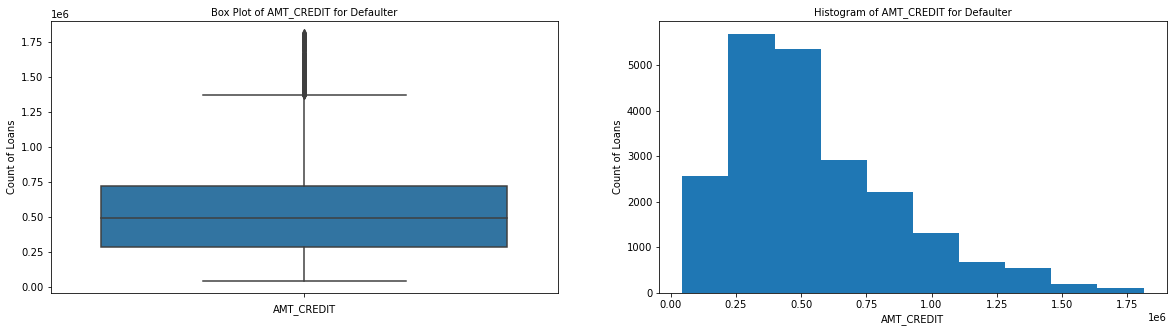

In [77]:
box_hist_plot('AMT_CREDIT')

In [147]:
app_data.AMT_CREDIT.describe()

count    2.471060e+05
mean     5.909945e+05
std      3.720219e+05
min      4.500000e+04
25%      2.736360e+05
50%      5.185620e+05
75%      8.086500e+05
max      1.817428e+06
Name: AMT_CREDIT, dtype: float64

we observe that the max no of defaulters credit amount lies between 250000 to around 500000 for defaulters

In [78]:
app_data.AMT_ANNUITY.describe()

count    247094.000000
mean      27197.590109
std       13703.184510
min        1980.000000
25%       16875.000000
50%       25537.500000
75%       34911.000000
max      180000.000000
Name: AMT_ANNUITY, dtype: float64

In [149]:
app_data.AMT_ANNUITY.quantile([0.99,1])

0.99     67500.0
1.00    180000.0
Name: AMT_ANNUITY, dtype: float64

Same as earlier situation we need to remove the outliers as 99% values are around 67500 

In [79]:
app_data[app_data.AMT_ANNUITY < app_data.AMT_ANNUITY.quantile(0.99)]

EXT_SOURCE_1  NONLIVINGAREA_MODE  NONLIVINGAREA_AVG  NONLIVINGAREA_MEDI  ELEVATORS_MEDI  ELEVATORS_AVG  ELEVATORS_MODE WALLSMATERIAL_MODE  APARTMENTS_MEDI  APARTMENTS_AVG  APARTMENTS_MODE  ENTRANCES_MEDI  ENTRANCES_AVG  ENTRANCES_MODE  LIVINGAREA_AVG  LIVINGAREA_MODE  LIVINGAREA_MEDI  HOUSETYPE_MODE  FLOORSMAX_MODE  FLOORSMAX_MEDI  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG  TOTALAREA_MODE EMERGENCYSTATE_MODE OCCUPATION_TYPE  EXT_SOURCE_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR NAME_TYPE_SUITE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  EXT_SOURCE_2  AMT_GOODS_PRICE  AMT_ANNUITY  CNT_FAM_MEMBERS  DAYS_LAST_PHONE_CHANGE  CNT_CHILDREN FLAG_DOCUMENT_8 NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_DOCUMENT_2 FLAG_DOCUMENT_3  \
0           0.083037              0.0000             0.0000              0.0000            0.00           0.00          0.0000       Stone, brick           0.0250          0.0247           0.0252          0.0690         0.0690          0.0690          0.0190           0.0198           0.0193  block of flats          0.0833          0.0833         0.0833                        0.9722                        0.9722                       0.9722          0.0149                  No        Laborers      0.139376                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0   Unaccompanied                       2.0                       2.0                       2.0                       2.0      0.262949         351000.0      24700.5              1.0                 -1134.0             0               N         Cash loans           M            N               N               Y   
1           0.311267              0.0000             0.0098              0.0100            0.08           0.08          0.0806              Block           0.0968          0.0959           0.0924          0.0345         0.0345          0.0345          0.0549           0.0554           0.0558  block of flats          0.2917          0.2917         0.2917                        0.9851                        0.9851                       0.9851          0.0714                  No      Core staff           NaN                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0          Family                       1.0                       0.0                       1.0                       0.0      0.622246        1129500.0      35698.5              2.0                  -828.0             0               N         Cash loans           F            N               N               Y   
2                NaN                 NaN                NaN                 NaN             NaN            NaN             NaN                NaN              NaN             NaN              NaN             NaN            NaN             NaN             NaN              NaN              NaN             NaN             NaN             NaN            NaN                           NaN                           NaN                          NaN             NaN                 NaN        Laborers      0.729567                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0   Unaccompanied                       0.0                       0.0                       0.0                       0.0      0.555912         135000.0       6750.0              1.0                  -815.0             0               N    Revolving loans           M            Y               N               N   
3                NaN                 NaN        

In [80]:
app_data = app_data[app_data.AMT_ANNUITY < app_data.AMT_ANNUITY.quantile(0.99)]

In [81]:
#update defaulter and non_defaulter with updated app_data
defaulter=app_data[app_data.TARGET==1] 
non_defaulter=app_data[app_data.TARGET==0]

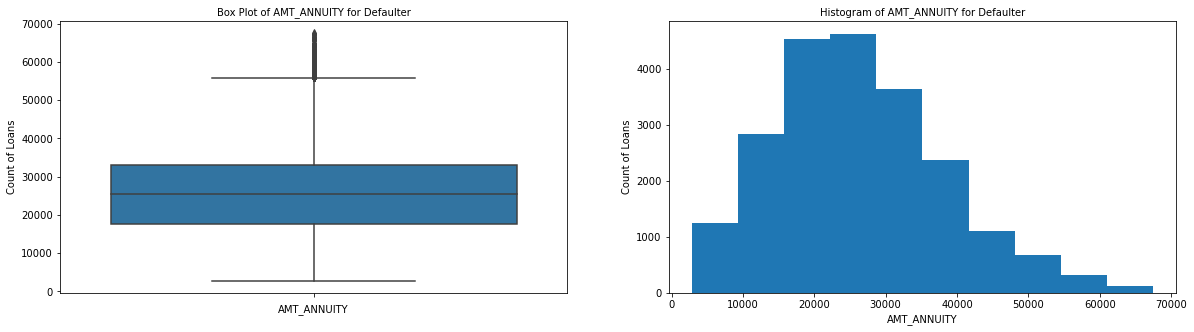

In [82]:
box_hist_plot('AMT_ANNUITY')

In [83]:
app_data.DAYS_BIRTH/-365

0         25.920548
1         45.931507
2         52.180822
3         52.068493
4         54.608219
            ...    
307504    45.767123
307506    25.553425
307508    41.002740
307509    32.769863
307510    46.180822
Name: DAYS_BIRTH, Length: 244517, dtype: float64

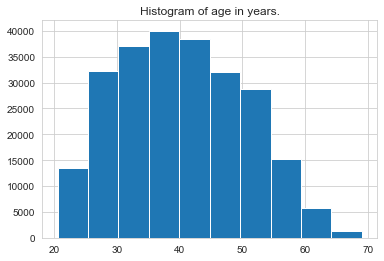

In [84]:
app_data['AGE']=app_data.DAYS_BIRTH/-365


sns.set_style('whitegrid')

plt.hist(app_data['AGE']);
plt.title('Histogram of age in years.');

Age is by all accounts genuinely distributed with respect to loan count  ranging highest count in range of 35-40 and then sort of dropping down as the age progressess

In [85]:
app_data['DAYS_EMPLOYED'].describe()

count    244517.000000
mean      -2373.706106
std        2333.938177
min      -17912.000000
25%       -3161.000000
50%       -1637.000000
75%        -762.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

In [86]:
app_data.shape

(244517, 100)

In [87]:
#Deriving variable "Years Employed" from days employed
app_data['YEARS_EMPLOYED'] = (app_data['DAYS_EMPLOYED']/-365)


In [88]:
app_data['YEARS_EMPLOYED']

#update defaulter and non_defaulter with updated app_data
defaulter=app_data[app_data.TARGET==1] 
non_defaulter=app_data[app_data.TARGET==0]

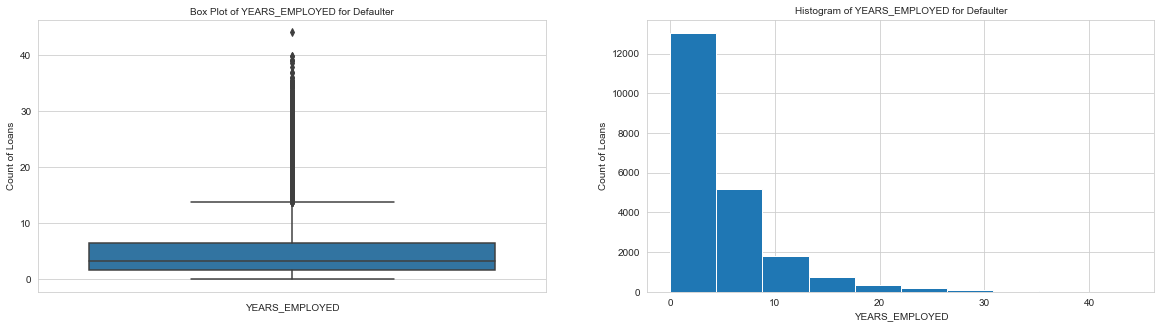

In [89]:
box_hist_plot('YEARS_EMPLOYED')

We can see that large no of defaulters of loan are people who do not work and people who are in early stages of there career that is people who have experience ranging less than 10 years

In [90]:
app_data.groupby(['NAME_INCOME_TYPE']).agg({'YEARS_EMPLOYED': ['mean', 'median', 'count', 'max'], 'AGE': ['median']})

YEARS_EMPLOYED                                     AGE
                               mean    median   count        max     median
NAME_INCOME_TYPE                                                           
Businessman                5.544292  4.838356       3   7.175342  52.487671
Commercial associate       5.802168  4.109589   67823  48.071233  39.668493
Maternity leave            6.453425  6.260274       4   9.942466  37.649315
Pensioner                 13.550137  7.673973      10  35.246575  56.819178
State servant              9.377678  7.139726   20894  48.172603  40.604110
Student                    6.951007  5.273973      17  21.931507  39.224658
Working                    6.422549  4.400000  155766  49.073973  39.826027

We see that from above non working people are generally student and pensioners but main customers of availing loan are people who are working 



In [91]:
app_data.groupby(['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE']).agg({'AMT_INCOME_TOTAL': ['mean', 'median', 'count', 'max']})

AMT_INCOME_TOTAL                            
                                                               mean    median   count       max
NAME_EDUCATION_TYPE           NAME_INCOME_TYPE                                                 
Academic degree               Commercial associate    234462.162162  225000.0      37  450000.0
                              State servant           227785.714286  207000.0      21  450000.0
                              Working                 209183.823529  186750.0      68  450000.0
Higher education              Businessman             195000.000000  180000.0       3  225000.0
                              Commercial associate    213123.064356  202500.0   21631  508500.0
                              Maternity leave         112500.000000  112500.0       2  135000.0
                              State servant           193755.311657  180000.0    8314  504000.0
                              Student                 164700.000000  171000.0       5  225000.0
                              Working                 182919.302553  162000.0   32363  513000.0
Incomplete higher             Commercial associate    192952.993987  180000.0    3243  495000.0
                              Pensioner                78750.000000   78750.0       1   78750.0
                              State servant           171814.369393  157500.0     758  472500.0
                              Student                 157500.000000  157500.0       1  157500.0
                              Working                 165031.338157  157500.0    5459  495000.0
Lower secondary               Commercial associate    161244.179204  135000.0     452  450000.0
                              State servant           138915.000000  114750.0     100  427500.0
                              Working                 137850.219427  130500.0    1709  450000.0
Secondary / secondary special Commercial associate    174795.816519  157500.0   42460  514480.5
                              Maternity leave          58500.000000   58500.0       2   67500.0
                              Pensioner               114500.000000  103500.0       9  157500.0
                              State servant           156185.240965  135000.0   11701  513000.0
                              Student                 138681.818182  144000.0      11  225000.0
                              Working                 150665.563542  135000.0  116167  495000.0

most of the loans are taken by working people with secondary education.

# Continuous Variables Analysis by Binning

In [92]:
pd.qcut(app_data['AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.50,0.90,1], labels=['Very_low','Low','Medium','High','Very_high'])

0             High
1             High
2         Very_low
3              Low
4              Low
            ...   
307504      Medium
307506      Medium
307508      Medium
307509        High
307510      Medium
Name: AMT_INCOME_TOTAL, Length: 244517, dtype: category
Categories (5, object): [Very_low < Low < Medium < High < Very_high]

In [96]:
defaulter.loc[:,'SALARY_BRACKET'] = pd.qcut(app_data.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.50,0.90,1], labels=['Very_low','Low','Medium','High','Very_high'])

In [97]:
defaulter.SALARY_BRACKET

0              High
26              Low
40             High
42              Low
94        Very_high
            ...    
307448         High
307475       Medium
307481         High
307489         High
307509         High
Name: SALARY_BRACKET, Length: 21497, dtype: category
Categories (5, object): [Very_low < Low < Medium < High < Very_high]

In [99]:
non_defaulter.loc[:,'SALARY_BRACKET'] = pd.qcut(app_data.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.50,0.90,1], labels=['Very_low','Low','Medium','High','Very_high'])

In [100]:
non_defaulter.SALARY_BRACKET

1             High
2         Very_low
3              Low
4              Low
5              Low
            ...   
307503         Low
307504      Medium
307506      Medium
307508      Medium
307510      Medium
Name: SALARY_BRACKET, Length: 223020, dtype: category
Categories (5, object): [Very_low < Low < Medium < High < Very_high]

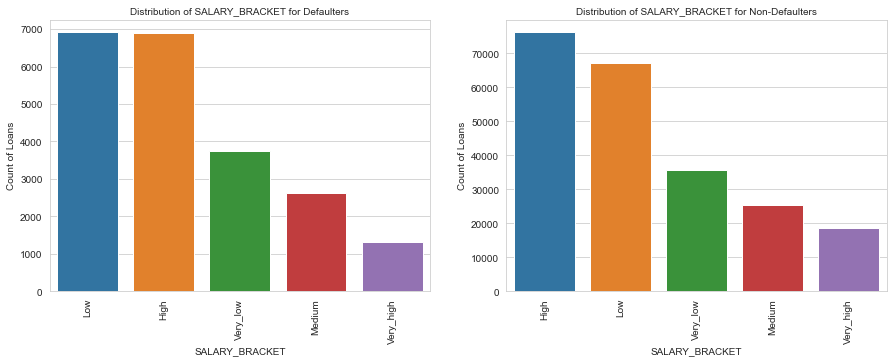

In [101]:
#As this is a categorical data we can use our earlier plot_chart function for our analysis 

plot_chart('SALARY_BRACKET', label_rotation=True,horizontal_layout=True)

Above scenario shows that people having lower salary bracket tend to be defaulters and also are high loan counts and higher salary one are the ones who dont seem to be defaulters  .For the rest scenarios are similar in both the TARGET case .

In [102]:
defaulter.loc[:,'AMT_ANNUTITY_BIN'] = pd.qcut(app_data.loc[:,'AMT_ANNUITY'],q=[0,0.10,0.35,0.50,0.90,1], labels=['Very_low','Low','Medium','High','Very_high'])
non_defaulter.loc[:,'AMT_ANNUTITY_BIN'] = pd.qcut(app_data.loc[:,'AMT_ANNUITY'],q=[0,0.10,0.35,0.50,0.90,1], labels=['Very_low','Low','Medium','High','Very_high'])


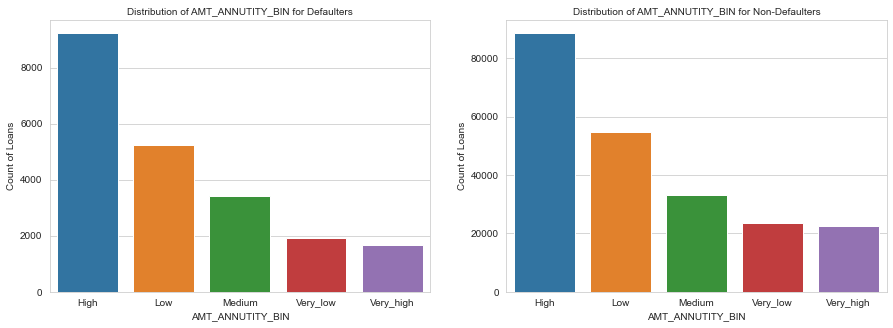

In [103]:
plot_chart('AMT_ANNUTITY_BIN', label_rotation=False,horizontal_layout=True)

maxinum number of defaulters have Low_annuity Values, while maximum number of non-defaulters have high annuity

In [104]:
app_data.EXT_SOURCE_1.describe()

count    117258.000000
mean          0.478644
std           0.205172
min           0.014568
25%           0.315700
50%           0.476658
75%           0.640971
max           0.942680
Name: EXT_SOURCE_1, dtype: float64

In [200]:
defaulter.loc[:,'Rating1']=pd.qcut(app_data.loc[:,'EXT_SOURCE_1'],[0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])
non_defaulter.loc[:,'Rating1']=pd.qcut(app_data.loc[:,'EXT_SOURCE_1'],[0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])

KeyError: 'Rating1'

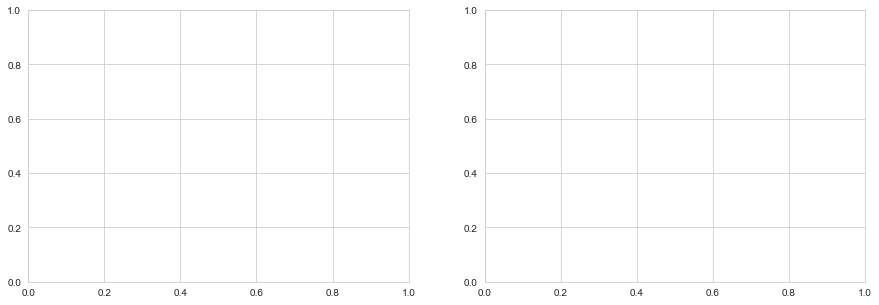

In [105]:
plot_chart('Rating1', label_rotation=True,horizontal_layout=True)


A large number of defaulters have very Low rating, while a large number of non-defaulters have a high rating.

In [106]:
defaulter.loc[:,'Rating2']=pd.qcut(app_data.loc[:,'EXT_SOURCE_2'],[0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])
non_defaulter.loc[:,'Rating2']=pd.qcut(app_data.loc[:,'EXT_SOURCE_2'],[0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])

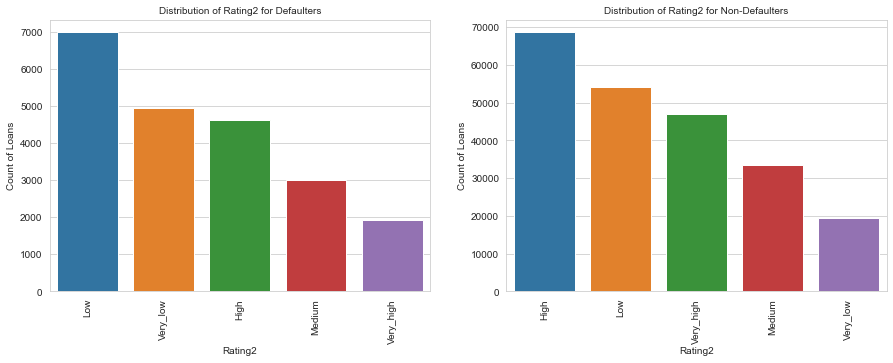

In [107]:
plot_chart('Rating2', label_rotation=True,horizontal_layout=True)


For second EXT_SOURCE also large number of defaulters have very Low rating, while a large number of non-defaulters have a high rating.

In [108]:
# Analysing  what is the impact of age in terms of people taking loans by binning the age 


app_data.loc[:,['TARGET','DAYS_BIRTH']]

TARGET  DAYS_BIRTH
0            1       -9461
1            0      -16765
2            0      -19046
3            0      -19005
4            0      -19932
...        ...         ...
307504       0      -16705
307506       0       -9327
307508       0      -14966
307509       1      -11961
307510       0      -16856

[244517 rows x 2 columns]

In [109]:
age_target = app_data.loc[:,['TARGET','DAYS_BIRTH']]

In [110]:
age_target.loc[:,'YEARS_BIRTH'] = app_data.loc[:,'DAYS_BIRTH']/ -365


age_target.YEARS_BIRTH

# Binning  the age data

age_target.loc[:,'YEARS_BINNED'] = pd.cut(age_target.loc[:,'YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))

In [111]:
age_target.head(10)

TARGET  DAYS_BIRTH  YEARS_BIRTH  YEARS_BINNED
0        1       -9461    25.920548  (25.0, 30.0]
1        0      -16765    45.931507  (45.0, 50.0]
2        0      -19046    52.180822  (50.0, 55.0]
3        0      -19005    52.068493  (50.0, 55.0]
4        0      -19932    54.608219  (50.0, 55.0]
5        0      -16941    46.413699  (45.0, 50.0]
6        0      -13778    37.747945  (35.0, 40.0]
7        0      -18850    51.643836  (50.0, 55.0]
9        0      -14469    39.641096  (35.0, 40.0]
10       0      -10197    27.936986  (25.0, 30.0]

In [214]:
age_target.shape

(244517, 4)

In [216]:
age_target.groupby('YEARS_BINNED').mean()

TARGET    DAYS_BIRTH  YEARS_BIRTH
YEARS_BINNED                                     
(20.0, 25.0]  0.123251  -8531.614757    23.374287
(25.0, 30.0]  0.112607 -10154.343369    27.820119
(30.0, 35.0]  0.103986 -11853.906091    32.476455
(35.0, 40.0]  0.091011 -13706.036501    37.550785
(40.0, 45.0]  0.079268 -15495.452594    42.453295
(45.0, 50.0]  0.075226 -17321.735430    47.456809
(50.0, 55.0]  0.068711 -19178.392431    52.543541
(55.0, 60.0]  0.059512 -20894.340547    57.244769
(60.0, 65.0]  0.047310 -22675.719391    62.125259
(65.0, 70.0]  0.029162 -24293.911300    66.558661

In [112]:
age_groups = age_target.groupby('YEARS_BINNED').mean()

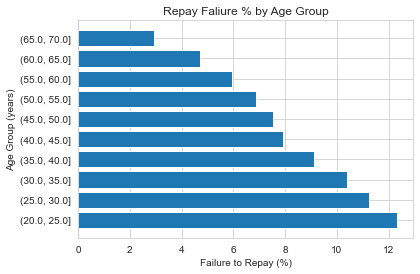

In [113]:

# Graph the age bins and the average of the target as a bar plot
plt.barh(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.ylabel('Age Group (years)')
plt.xlabel('Failure to Repay (%)')
plt.title('Repay Faliure % by Age Group');

We can see that maximum failure to repay is from age group 20 to 25 and majority is lying in 20 to 40 years of range

# Bivariate Analysis

In [114]:
#After analysing the columns excel provided to us  selecting the below columns for our bivariate Analysis


biv_col=['EXT_SOURCE_1', 'EXT_SOURCE_3', 'EXT_SOURCE_2','AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL',
       'DAYS_REGISTRATION', 'REGION_POPULATION_RELATIVE','CNT_CHILDREN', 'HOUR_APPR_PROCESS_START','REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED', 'DAYS_BIRTH']

In [115]:
#first finding out the correlation between different attributes  for the defaulters ussing corr() function

defaulter_1=defaulter[biv_col]
defaulter_correlation = defaulter_1.corr()
round(defaulter_correlation, 3)

EXT_SOURCE_1  EXT_SOURCE_3  EXT_SOURCE_2  AMT_GOODS_PRICE  AMT_ANNUITY  CNT_FAM_MEMBERS  DAYS_LAST_PHONE_CHANGE  AMT_CREDIT  AMT_INCOME_TOTAL  DAYS_REGISTRATION  REGION_POPULATION_RELATIVE  CNT_CHILDREN  HOUR_APPR_PROCESS_START  REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT  DAYS_ID_PUBLISH  DAYS_EMPLOYED  DAYS_BIRTH
EXT_SOURCE_1                        1.000         0.122         0.182            0.194        0.118           -0.009                  -0.139       0.186             0.110             -0.121                       0.084        -0.047                    0.024                       -0.074                -0.077           -0.068         -0.223      -0.520
EXT_SOURCE_3                        0.122         1.000         0.078            0.092        0.052            0.001                  -0.070       0.091            -0.050             -0.061                      -0.012        -0.000                   -0.042                        0.012                 0.015           -0.114         -0.086      -0.147
EXT_SOURCE_2                        0.182         0.078         1.000            0.131        0.109            0.004                  -0.211       0.120             0.140             -0.078                       0.166        -0.010                    0.129                       -0.247                -0.248           -0.066         -0.094      -0.142
AMT_GOODS_PRICE                     0.194         0.092         0.131            1.000        0.743            0.046                  -0.125       0.981             0.335             -0.036                       0.074        -0.005                    0.039                       -0.074                -0.063           -0.065         -0.115      -0.186
AMT_ANNUITY                         0.118         0.052         0.109            0.743        1.000            0.057                  -0.082       0.745             0.401              0.016                       0.063         0.018                    0.017                       -0.080                -0.065           -0.043         -0.049      -0.088
CNT_FAM_MEMBERS                    -0.009         0.001         0.004            0.046        0.057            1.000                  -0.014       0.049            -0.022              0.123                      -0.031         0.894                   -0.040                        0.052                 0.048           -0.087         -0.000       0.111
DAYS_LAST_PHONE_CHANGE             -0.139        -0.070        -0.211           -0.125       -0.082           -0.014                   1.000      -0.117            -0.081              0.087                      -0.054         0.011                   -0.018                        0.018                 0.016            0.135          0.169       0.146
AMT_CREDIT                          0.186         0.091         0.120            0.981        0.745            0.049                  -0.117       1.000             0.333             -0.037                       0.066         0.001                    0.025                       -0.067                -0.055           -0.063         -0.109      -0.190
AMT_INCOME_TOTAL                    0.110        -0.050         0.140            0.335        0.401           -0.022                  -0.081       0.333             1.000              0.008                       0.112        -0.028                    0.068                       -0.182                -0.165           -0.041         -0.028      -0.098
DAYS_REGISTRATION                  -0.121        -0.061        -0.078           -0.036        0.016            0.123                   0.087      -0.037             0.008              1.000                      -0.055         0.125                   -0.049                        0.108                 0.112            0.050          0.137       0.240
REGION_POPULATION_RELATIVE          0.084        -0.012         0.166            0.074        0.063           -0.031                  -0.054       0.066     

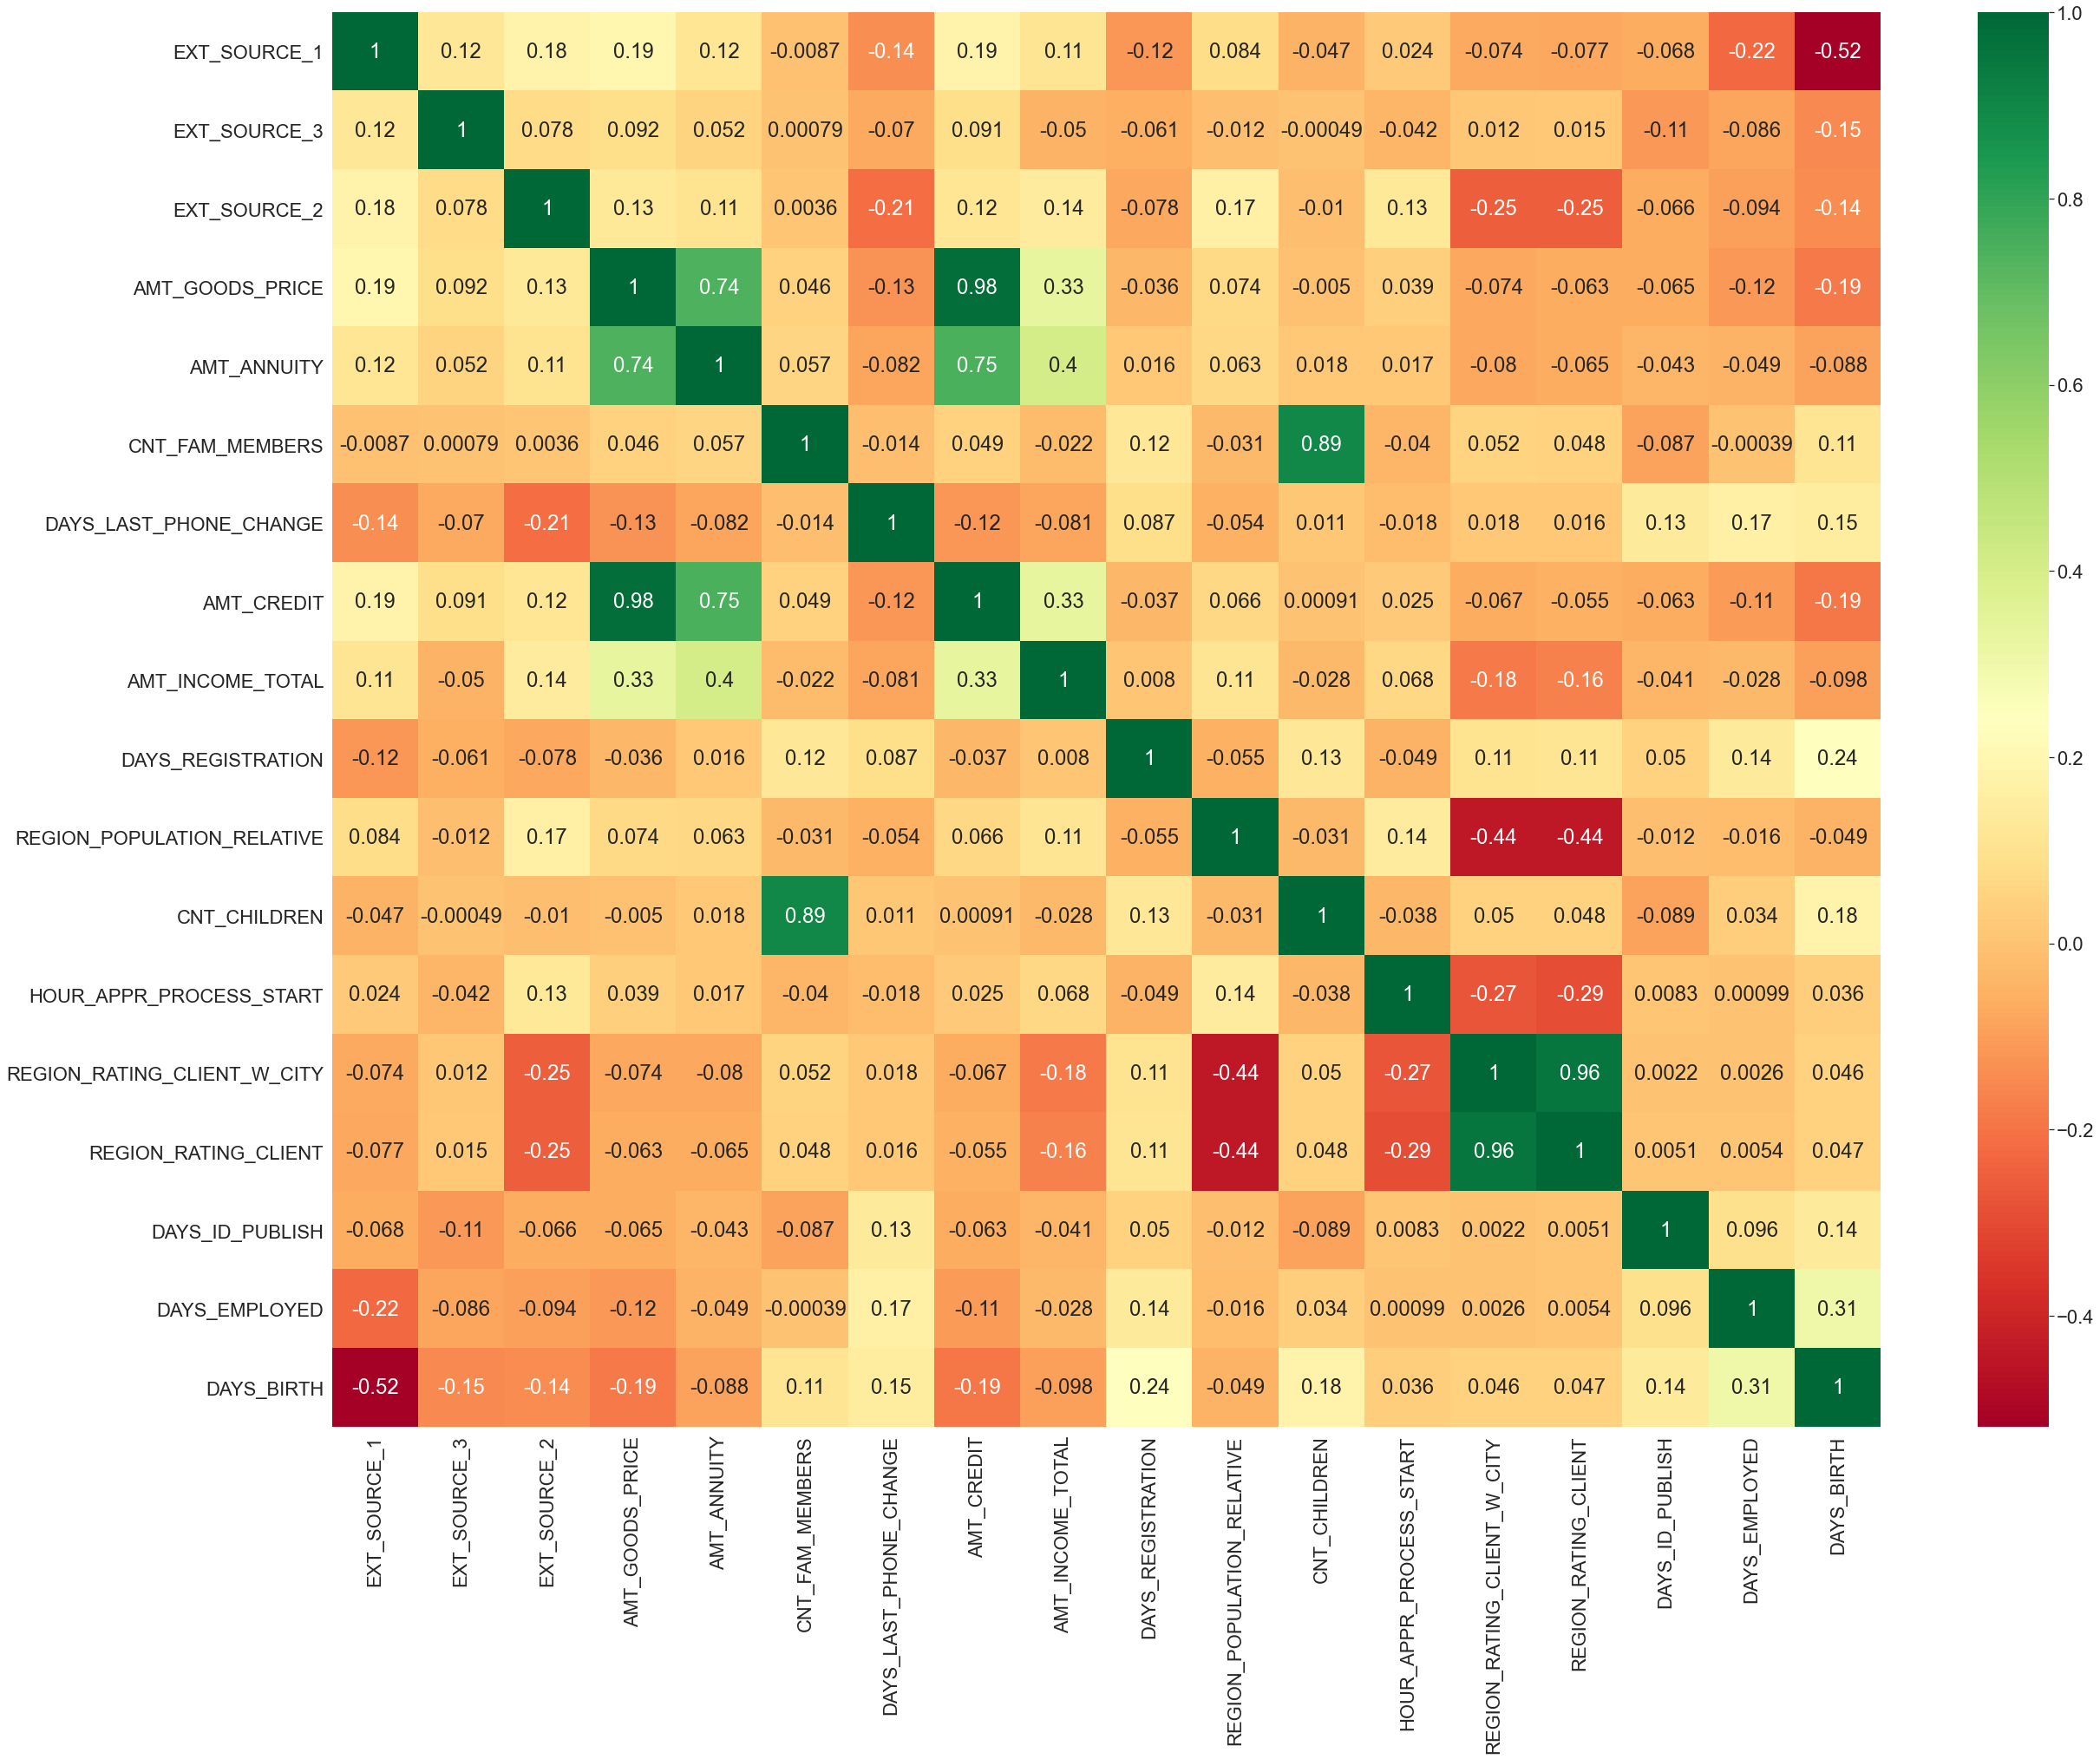

In [116]:
# figure size
plt.figure(figsize=(40,30))

# heatmap
sns.set(font_scale=2.0)
sns.heatmap(defaulter_correlation, cmap='RdYlGn', annot=True)
plt.show()

We can make the below inferences for correlation between the different variables :
    
5 most positive correlations
AMT_CREDIT - AMT_GOODS_PRICE
REGION_RATING_CLIENT_W_CITY - REGION_RATING_CLIENT
CNT_CHILDREN - CNT_FAM_MEMBERS
AMT_CREDIT - AMT_ANNUITY
AMT_GOODS_PRICE - AMT_ANNUITY

5 most negative correlations
HOUR_APPR_PROCESS_START - REGION_RATING_CLIENT_W_CITY
REGION_RATING_CLIENT - HOUR_APPR_PROCESS_START
REGION_POPULATION_RELATIVE - REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY - REGION_POPULATION_RELATIVE
EXT_SOURCE_1 - DAYS_BIRTH    

In [118]:
#Now finding out the correlation between different attributes  for the non_defaulters ussing corr() function

non_defaulter_1=non_defaulter[biv_col]
non_defaulter_correlation = non_defaulter_1.corr()
round(non_defaulter_correlation, 3)

EXT_SOURCE_1  EXT_SOURCE_3  EXT_SOURCE_2  AMT_GOODS_PRICE  AMT_ANNUITY  CNT_FAM_MEMBERS  DAYS_LAST_PHONE_CHANGE  AMT_CREDIT  AMT_INCOME_TOTAL  DAYS_REGISTRATION  REGION_POPULATION_RELATIVE  CNT_CHILDREN  HOUR_APPR_PROCESS_START  REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT  DAYS_ID_PUBLISH  DAYS_EMPLOYED  DAYS_BIRTH
EXT_SOURCE_1                        1.000         0.151         0.214            0.187        0.136           -0.046                  -0.143       0.180             0.118             -0.151                       0.096        -0.088                    0.049                       -0.120                -0.120           -0.071         -0.249      -0.558
EXT_SOURCE_3                        0.151         1.000         0.096            0.053        0.034            0.001                  -0.082       0.051            -0.070             -0.090                      -0.013        -0.015                   -0.036                       -0.003                -0.004           -0.101         -0.120      -0.175
EXT_SOURCE_2                        0.214         0.096         1.000            0.127        0.111           -0.010                  -0.197       0.120             0.159             -0.073                       0.199        -0.026                    0.150                       -0.283                -0.288           -0.060         -0.081      -0.141
AMT_GOODS_PRICE                     0.187         0.053         0.127            1.000        0.767            0.037                  -0.086       0.984             0.357             -0.018                       0.081        -0.022                    0.043                       -0.088                -0.082           -0.036         -0.090      -0.150
AMT_ANNUITY                         0.136         0.034         0.111            0.767        1.000            0.044                  -0.072       0.769             0.426              0.006                       0.095        -0.007                    0.025                       -0.121                -0.109           -0.024         -0.048      -0.090
CNT_FAM_MEMBERS                    -0.046         0.001        -0.010            0.037        0.044            1.000                  -0.025       0.039            -0.010              0.157                      -0.029         0.893                   -0.037                        0.043                 0.042           -0.111          0.032       0.178
DAYS_LAST_PHONE_CHANGE             -0.143        -0.082        -0.197           -0.086       -0.072           -0.025                   1.000      -0.083            -0.055              0.071                      -0.046        -0.002                   -0.010                        0.024                 0.025            0.107          0.137       0.137
AMT_CREDIT                          0.180         0.051         0.120            0.984        0.769            0.039                  -0.083       1.000             0.354             -0.021                       0.077        -0.018                    0.033                       -0.088                -0.081           -0.034         -0.088      -0.156
AMT_INCOME_TOTAL                    0.118        -0.070         0.159            0.357        0.426           -0.010                  -0.055       0.354             1.000              0.038                       0.181        -0.017                    0.062                       -0.231                -0.211           -0.032         -0.034      -0.051
DAYS_REGISTRATION                  -0.151        -0.090        -0.073           -0.018        0.006            0.157                   0.071      -0.021             0.038              1.000                      -0.060         0.164                   -0.031                        0.089                 0.096            0.029          0.173       0.301
REGION_POPULATION_RELATIVE          0.096        -0.013         0.199            0.081        0.095           -0.029                  -0.046       0.077     

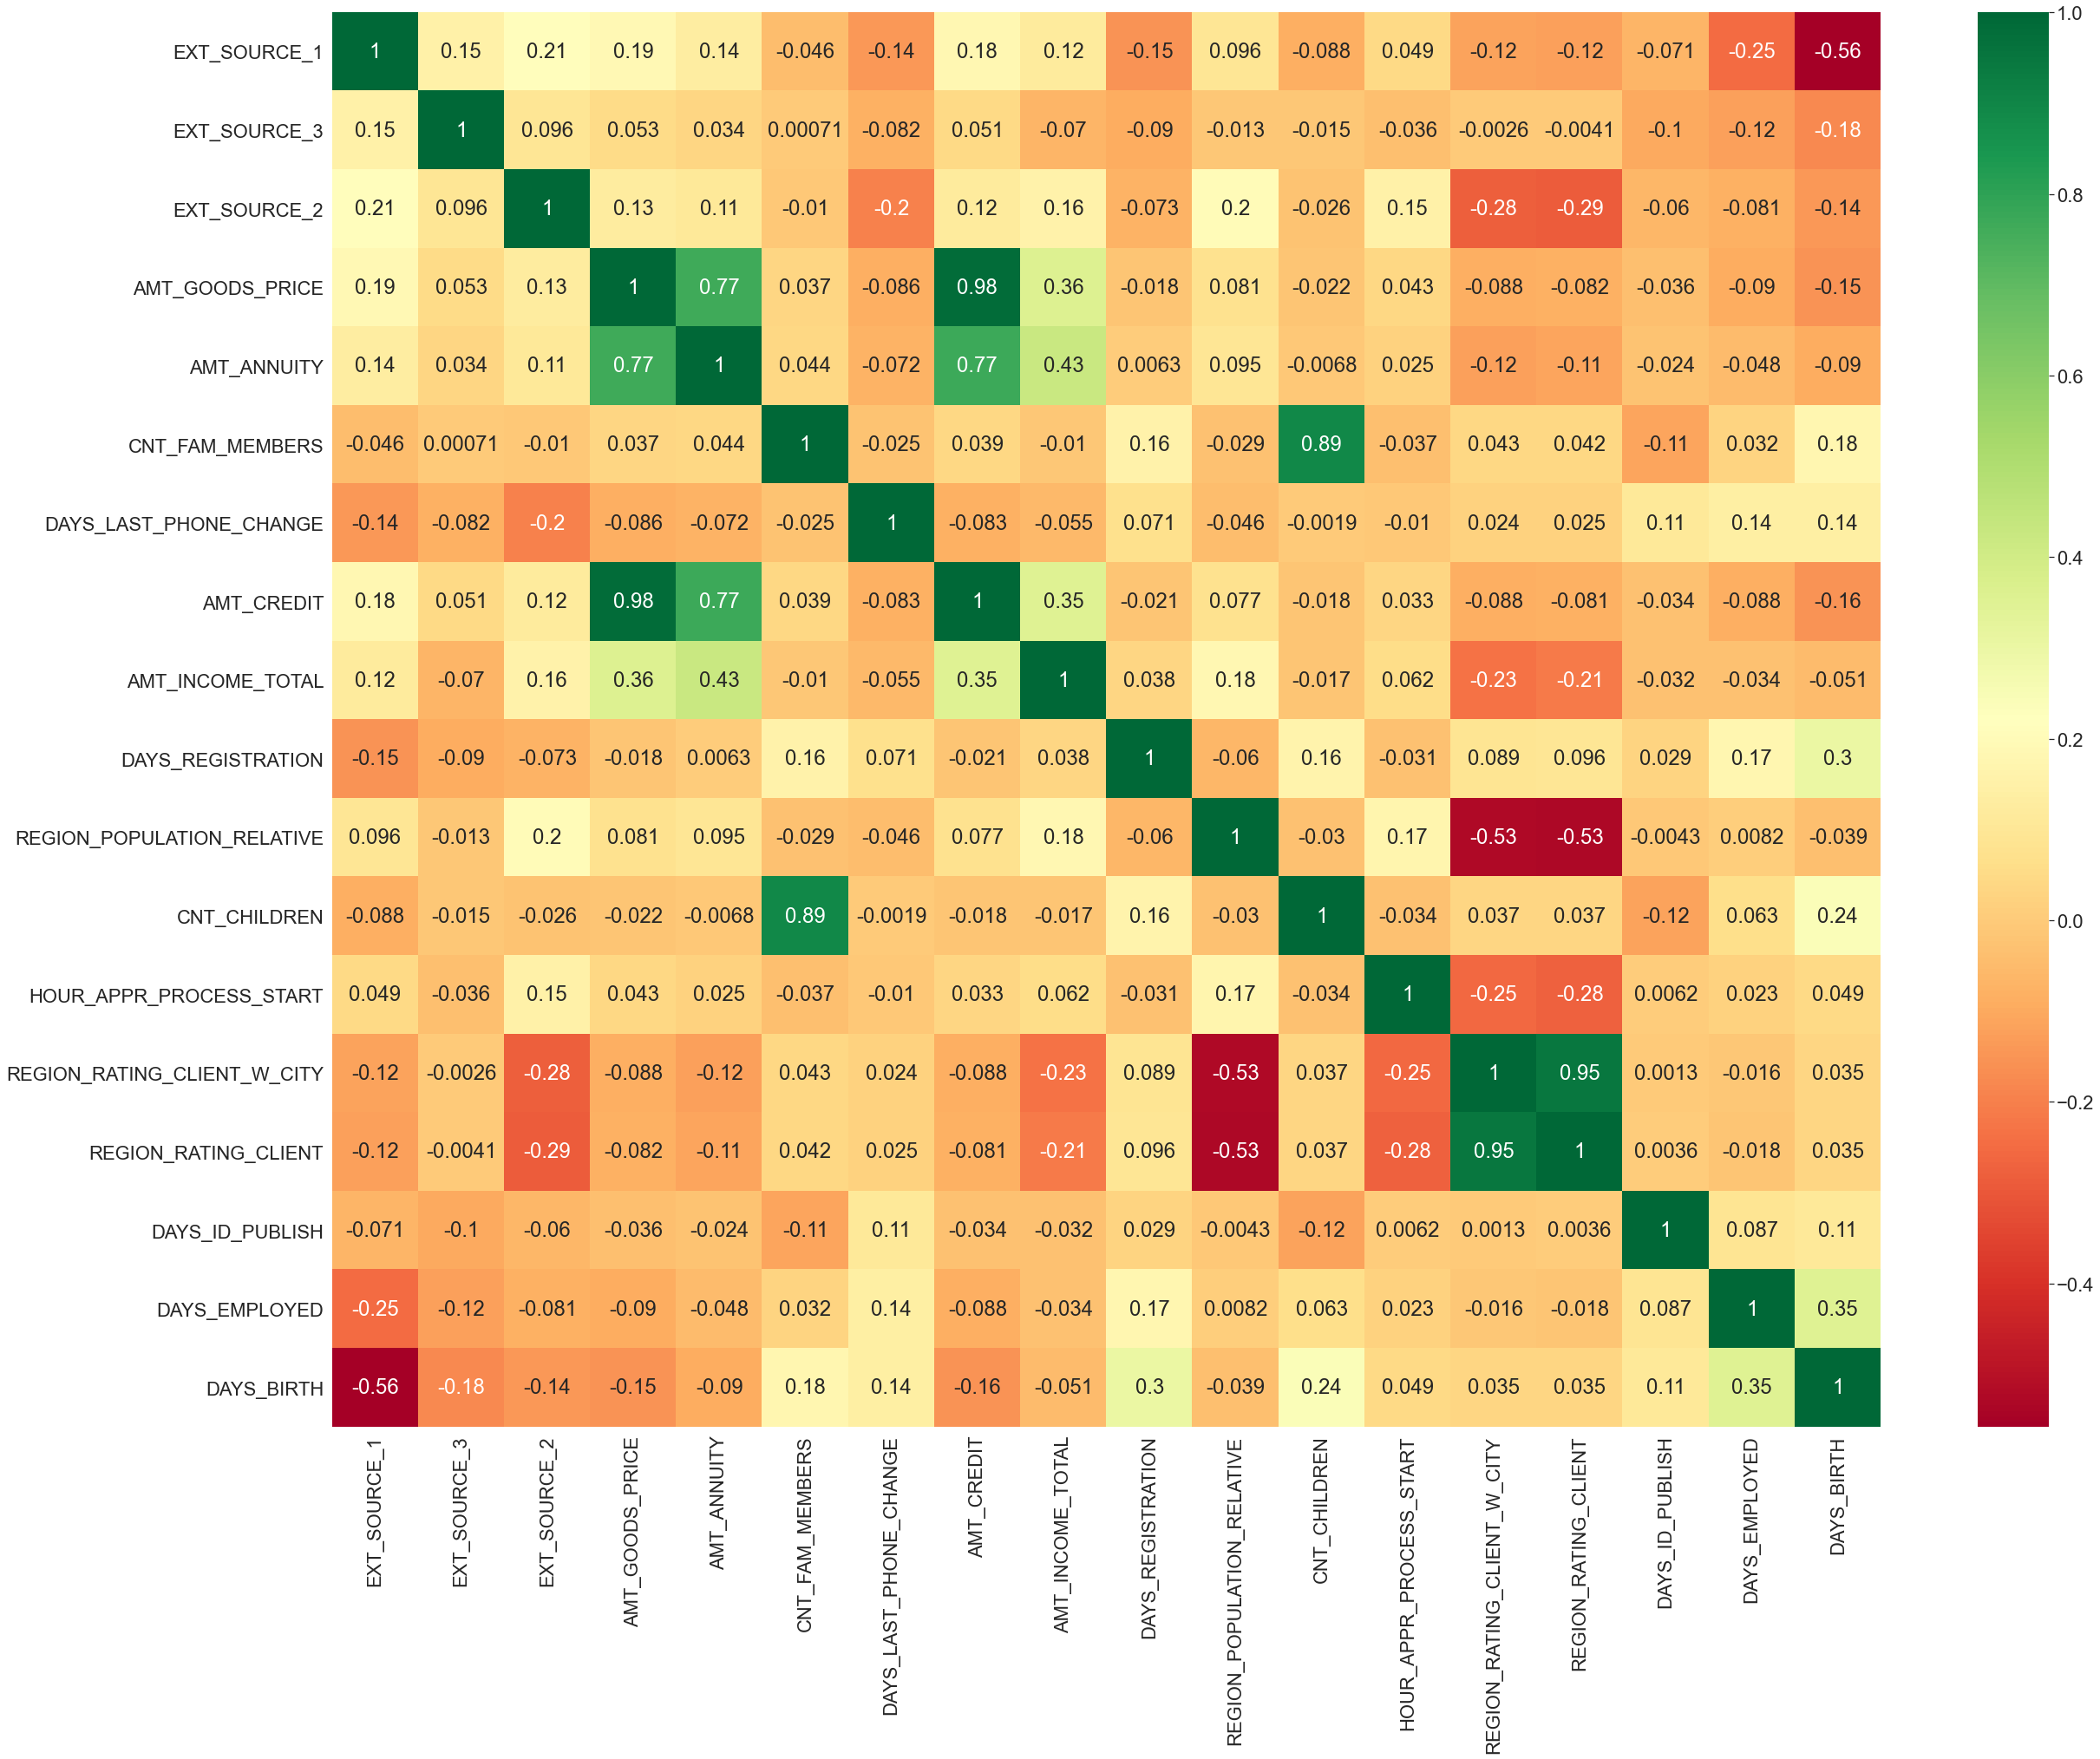

In [241]:
# figure size
plt.figure(figsize=(40,30))

# heatmap
sns.set(font_scale=2.0)
sns.heatmap(non_defaulter_correlation, cmap='RdYlGn', annot=True)
plt.show()

# Analysis of Previous Application Dataset

In [119]:
#importing data from CSV file into pandas dataframe

prev_app_data = pd.read_csv("previous_application.csv")

In [120]:
prev_app_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

In [121]:
prev_app_data.shape

(1670214, 37)

In [122]:
prev_app_data.dtypes.value_counts()

object     16
float64    15
int64       6
dtype: int64

In [123]:
prev_app_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], dtype='object')

In [124]:
prev_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [125]:
empty=prev_app_data.isnull().sum()
null_percent = (prev_app_data.isnull().sum()/prev_app_data.isnull().count()*100)
unique_val = prev_app_data.nunique()
datatypes = prev_app_data.dtypes

pd.concat([empty, null_percent, unique_val, datatypes], axis=1, keys=['Null_count', 'Null_Percent', 'Unique', 'Data_Type']).sort_values(by="Null_Percent", ascending=False)

Null_count  Null_Percent   Unique Data_Type
RATE_INTEREST_PRIVILEGED        1664263     99.643698       25   float64
RATE_INTEREST_PRIMARY           1664263     99.643698      148   float64
AMT_DOWN_PAYMENT                 895844     53.636480    29278   float64
RATE_DOWN_PAYMENT                895844     53.636480   207033   float64
NAME_TYPE_SUITE                  820405     49.119754        7    object
NFLAG_INSURED_ON_APPROVAL        673065     40.298129        2   float64
DAYS_TERMINATION                 673065     40.298129     2830   float64
DAYS_LAST_DUE                    673065     40.298129     2873   float64
DAYS_LAST_DUE_1ST_VERSION        673065     40.298129     4605   float64
DAYS_FIRST_DUE                   673065     40.298129     2892   float64
DAYS_FIRST_DRAWING               673065     40.298129     2838   float64
AMT_GOODS_PRICE                  385515     23.081773    93885   float64
AMT_ANNUITY                      372235     22.286665   357959   float64
CNT_PAYMENT                      372230     22.286366       49   float64
PRODUCT_COMBINATION                 346      0.020716       17    object
AMT_CREDIT                            1      0.000060    86803   float64
NAME_YIELD_GROUP                      0      0.000000        5    object
NAME_PORTFOLIO                        0      0.000000        5    object
NAME_SELLER_INDUSTRY                  0      0.000000       11    object
SELLERPLACE_AREA                      0      0.000000     2097     int64
CHANNEL_TYPE                          0      0.000000        8    object
NAME_PRODUCT_TYPE                     0      0.000000        3    object
SK_ID_PREV                            0      0.000000  1670214     int64
NAME_GOODS_CATEGORY                   0      0.000000       28    object
NAME_CLIENT_TYPE                      0      0.000000        4    object
CODE_REJECT_REASON                    0      0.000000        9    object
SK_ID_CURR                            0      0.000000   338857     int64
DAYS_DECISION                         0      0.000000     2922     int64
NAME_CONTRACT_STATUS                  0      0.000000        4    object
NAME_CASH_LOAN_PURPOSE                0      0.000000       25    object
NFLAG_LAST_APPL_IN_DAY                0      0.000000        2     int64
FLAG_LAST_APPL_PER_CONTRACT           0      0.000000        2    object
HOUR_APPR_PROCESS_START               0      0.000000       24     int64
WEEKDAY_APPR_PROCESS_START            0      0.000000        7    object
AMT_APPLICATION                       0      0.000000    93885   float64
NAME_CONTRACT_TYPE                    0      0.000000        4    object
NAME_PAYMENT_TYPE                     0      0.000000        4    object

In [126]:
prev_app_null =pd.concat([empty, null_percent, unique_val, datatypes], axis=1, keys=['Null_count', 'Null_Percent', 'Unique', 'Data_Type']).sort_values(by="Null_Percent", ascending=False)
prev_app_null.reset_index(drop=False).head(20)

index  Null_count  Null_Percent  Unique Data_Type
0    RATE_INTEREST_PRIVILEGED     1664263     99.643698      25   float64
1       RATE_INTEREST_PRIMARY     1664263     99.643698     148   float64
2            AMT_DOWN_PAYMENT      895844     53.636480   29278   float64
3           RATE_DOWN_PAYMENT      895844     53.636480  207033   float64
4             NAME_TYPE_SUITE      820405     49.119754       7    object
5   NFLAG_INSURED_ON_APPROVAL      673065     40.298129       2   float64
6            DAYS_TERMINATION      673065     40.298129    2830   float64
7               DAYS_LAST_DUE      673065     40.298129    2873   float64
8   DAYS_LAST_DUE_1ST_VERSION      673065     40.298129    4605   float64
9              DAYS_FIRST_DUE      673065     40.298129    2892   float64
10         DAYS_FIRST_DRAWING      673065     40.298129    2838   float64
11            AMT_GOODS_PRICE      385515     23.081773   93885   float64
12                AMT_ANNUITY      372235     22.286665  357959   float64
13                CNT_PAYMENT      372230     22.286366      49   float64
14        PRODUCT_COMBINATION         346      0.020716      17    object
15                 AMT_CREDIT           1      0.000060   86803   float64
16           NAME_YIELD_GROUP           0      0.000000       5    object
17             NAME_PORTFOLIO           0      0.000000       5    object
18       NAME_SELLER_INDUSTRY           0      0.000000      11    object
19           SELLERPLACE_AREA           0      0.000000    2097     int64

We identified from above the columns having high null values ,we need to handle them efficently so that it does not impact our analysis
.We can see top two columns having 99% data as null which is not helpful to us thus we will discard the rows having null above 55% and continue our anaylsis

In [127]:
#dropping columns with more than 55% missing values 
cols_to_keep=list(prev_app_null[(prev_app_null.Null_Percent<55)].index)
prev_app_data=prev_app_data[cols_to_keep]
prev_app_data.describe()

AMT_DOWN_PAYMENT  RATE_DOWN_PAYMENT  NFLAG_INSURED_ON_APPROVAL  DAYS_TERMINATION  DAYS_LAST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DUE  DAYS_FIRST_DRAWING  AMT_GOODS_PRICE   AMT_ANNUITY   CNT_PAYMENT    AMT_CREDIT  SELLERPLACE_AREA    SK_ID_PREV    SK_ID_CURR  DAYS_DECISION  NFLAG_LAST_APPL_IN_DAY  HOUR_APPR_PROCESS_START  AMT_APPLICATION
count      7.743700e+05      774370.000000              997149.000000     997149.000000  997149.000000              997149.000000   997149.000000       997149.000000     1.284699e+06  1.297979e+06  1.297984e+06  1.670213e+06      1.670214e+06  1.670214e+06  1.670214e+06   1.670214e+06            1.670214e+06             1.670214e+06     1.670214e+06
mean       6.697402e+03           0.079637                   0.332570      81992.343838   76582.403064               33767.774054    13826.269337       342209.855039     2.278473e+05  1.595512e+04  1.605408e+01  1.961140e+05      3.139511e+02  1.923089e+06  2.783572e+05  -8.806797e+02            9.964675e-01             1.248418e+01     1.752339e+05
std        2.092150e+04           0.107823                   0.471134     153303.516729  149647.415123              106857.034789    72444.869708        88916.115834     3.153966e+05  1.478214e+04  1.456729e+01  3.185746e+05      7.127443e+03  5.325980e+05  1.028148e+05   7.790997e+02            5.932963e-02             3.334028e+00     2.927798e+05
min       -9.000000e-01          -0.000015                   0.000000      -2874.000000   -2889.000000               -2801.000000    -2892.000000        -2922.000000     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00     -1.000000e+00  1.000001e+06  1.000010e+05  -2.922000e+03            0.000000e+00             0.000000e+00     0.000000e+00
25%        0.000000e+00           0.000000                   0.000000      -1270.000000   -1314.000000               -1242.000000    -1628.000000       365243.000000     5.084100e+04  6.321780e+03  6.000000e+00  2.416050e+04     -1.000000e+00  1.461857e+06  1.893290e+05  -1.300000e+03            1.000000e+00             1.000000e+01     1.872000e+04
50%        1.638000e+03           0.051605                   0.000000       -499.000000    -537.000000                -361.000000     -831.000000       365243.000000     1.123200e+05  1.125000e+04  1.200000e+01  8.054100e+04      3.000000e+00  1.923110e+06  2.787145e+05  -5.810000e+02            1.000000e+00             1.200000e+01     7.104600e+04
75%        7.740000e+03           0.108909                   1.000000        -44.000000     -74.000000                 129.000000     -411.000000       365243.000000     2.340000e+05  2.065842e+04  2.400000e+01  2.164185e+05      8.200000e+01  2.384280e+06  3.675140e+05  -2.800000e+02            1.000000e+00             1.500000e+01     1.803600e+05
max        3.060045e+06           1.000000                   1.000000     365243.000000  365243.000000              365243.000000   365243.000000       365243.000000     6.905160e+06  4.180581e+05  8.400000e+01  6.905160e+06      4.000000e+06  2.845382e+06  4.562550e+05  -1.000000e+00            1.000000e+00             2.300000e+01     6.905160e+06

In [128]:
prev_app_data.shape

(1670214, 35)

In [129]:
#Checking columns with very less missing values
prev_app_null[(prev_app_null.Null_Percent>0)&(prev_app_null.Null_Percent<15)]


Null_count  Null_Percent  Unique Data_Type
PRODUCT_COMBINATION         346      0.020716      17    object
AMT_CREDIT                    1      0.000060   86803   float64

As the values are very  percent value is very low  and only two columns are within this we should not impute any values for this 

In [130]:
prev_app_null[(prev_app_null.Unique==2)&((prev_app_null.Data_Type=="int64")|(prev_app_null.Data_Type=="float64"))].index

Index(['NFLAG_INSURED_ON_APPROVAL', 'NFLAG_LAST_APPL_IN_DAY'], dtype='object')

In [131]:
convert_col=prev_app_null[(prev_app_null.Unique==2)&((prev_app_null.Data_Type=="int64")|(prev_app_null.Data_Type=="float64"))].index

In [132]:
for y in convert_col:
        prev_app_data.loc[:,y].replace((0, 1), ('N', 'Y'), inplace=True)

In [133]:
prev_app_data.dtypes.value_counts()

object     18
float64    12
int64       5
dtype: int64

In [134]:
#checking the percentage of different loan status for previous application data 

approved=prev_app_data[prev_app_data.NAME_CONTRACT_STATUS=='Approved']
refused=prev_app_data[prev_app_data.NAME_CONTRACT_STATUS=='Refused']
canceled=prev_app_data[prev_app_data.NAME_CONTRACT_STATUS=='Canceled']
unused=prev_app_data[prev_app_data.NAME_CONTRACT_STATUS=='Unused Offer']



In [135]:
prev_app_data.NAME_CONTRACT_STATUS.value_counts(normalize=True)

Approved        0.620747
Canceled        0.189388
Refused         0.174036
Unused offer    0.015828
Name: NAME_CONTRACT_STATUS, dtype: float64

We can see from above loan approval percent is around 62% cancelled and refused add up the remaining and unused offer is negligible

In [136]:
def loan_status_chart(var, label_rotation,horizontal_layout):
    
    if(horizontal_layout):
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(30,5))
    else:
        fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(15,30))
    
   
    
    d2=sns.countplot(ax=ax2,x=refused[var], data=refused, order= refused[var].value_counts().index)
    if(label_rotation):
        d2.set_xticklabels(d2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title("Refused Loan status", fontsize=15)
    
    d1=sns.countplot(ax=ax1,x=approved[var], data=approved, order= approved[var].value_counts().index)
    if(label_rotation):
        d1.set_xticklabels(d1.get_xticklabels(),rotation=90)
    ax1.set_title("Approved loan status", fontsize=15)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    
    
    d3=sns.countplot(ax=ax3,x=canceled[var], data=canceled, order= canceled[var].value_counts().index)
    ax3.set_title("Canceled loan status", fontsize=15)
    ax3.set_xlabel('%s' %var)
    ax3.set_ylabel("Count of Loans")
    if(label_rotation):
        d3.set_xticklabels(d3.get_xticklabels(),rotation=90)
        
    plt.show()

In [137]:
prev_app_data.select_dtypes('object').columns

Index(['NAME_TYPE_SUITE', 'NFLAG_INSURED_ON_APPROVAL', 'PRODUCT_COMBINATION', 'NAME_YIELD_GROUP', 'NAME_PORTFOLIO', 'NAME_SELLER_INDUSTRY', 'CHANNEL_TYPE', 'NAME_PRODUCT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_CLIENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CONTRACT_STATUS', 'NAME_CASH_LOAN_PURPOSE', 'NFLAG_LAST_APPL_IN_DAY', 'FLAG_LAST_APPL_PER_CONTRACT', 'WEEKDAY_APPR_PROCESS_START', 'NAME_CONTRACT_TYPE', 'NAME_PAYMENT_TYPE'], dtype='object')

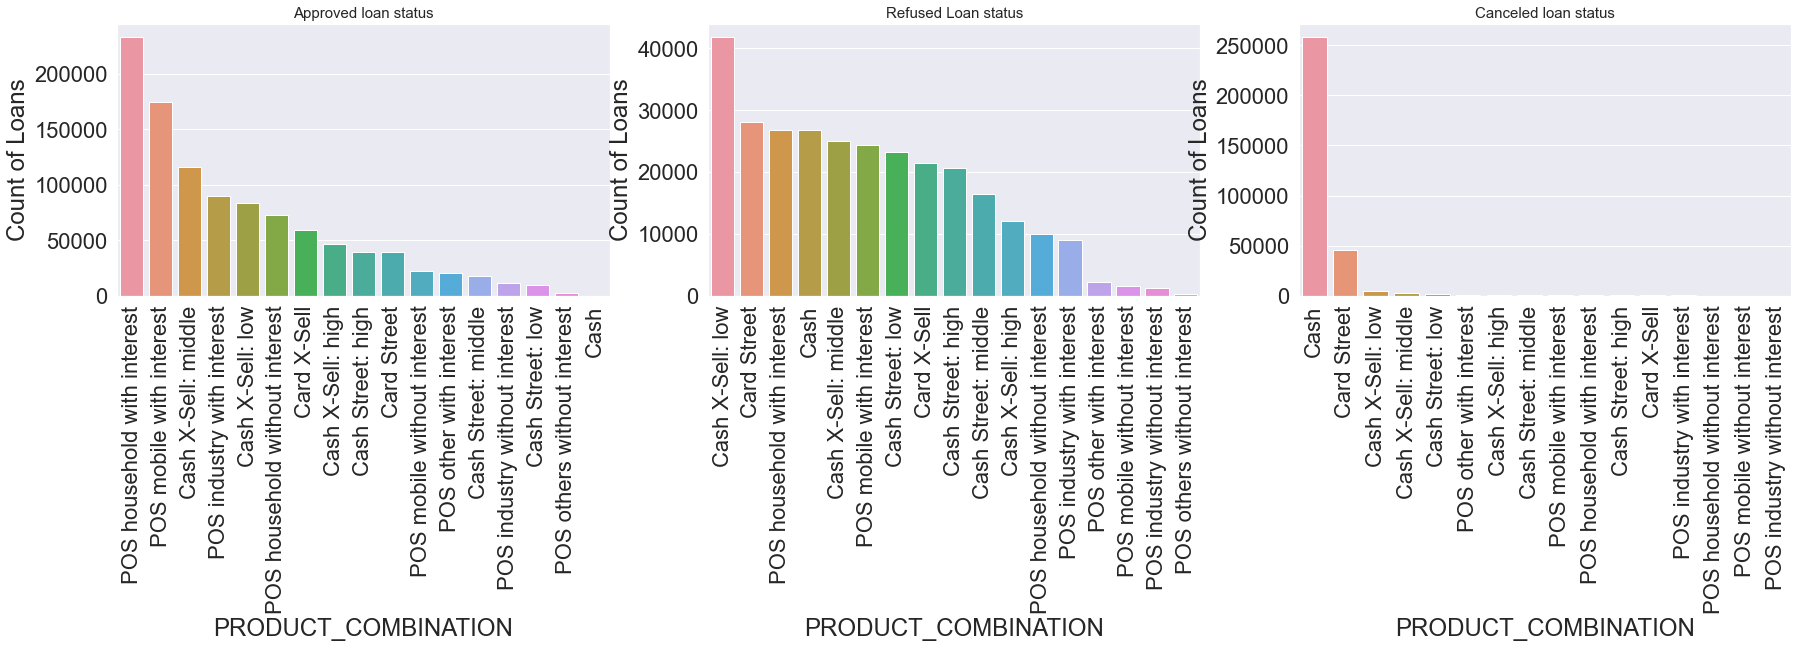

In [138]:
loan_status_chart('PRODUCT_COMBINATION', label_rotation=True,horizontal_layout=True)

We observe most number of loans were approved for POS household with interest.
Most number of refused loans were of Cash X-Sell: Low Product combination
Most Canceled loans were Cash loans

In [139]:
prev_app_data.NAME_YIELD_GROUP.value_counts()

XNA           517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64

In [140]:
prev_app_data[prev_app_data.NAME_YIELD_GROUP=='XNA']

AMT_DOWN_PAYMENT  RATE_DOWN_PAYMENT NAME_TYPE_SUITE NFLAG_INSURED_ON_APPROVAL  DAYS_TERMINATION  DAYS_LAST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DUE  DAYS_FIRST_DRAWING  AMT_GOODS_PRICE  AMT_ANNUITY  CNT_PAYMENT       PRODUCT_COMBINATION  AMT_CREDIT NAME_YIELD_GROUP NAME_PORTFOLIO  NAME_SELLER_INDUSTRY  SELLERPLACE_AREA             CHANNEL_TYPE NAME_PRODUCT_TYPE  SK_ID_PREV NAME_GOODS_CATEGORY NAME_CLIENT_TYPE CODE_REJECT_REASON  SK_ID_CURR  DAYS_DECISION NAME_CONTRACT_STATUS NAME_CASH_LOAN_PURPOSE NFLAG_LAST_APPL_IN_DAY FLAG_LAST_APPL_PER_CONTRACT  HOUR_APPR_PROCESS_START WEEKDAY_APPR_PROCESS_START  AMT_APPLICATION NAME_CONTRACT_TYPE      NAME_PAYMENT_TYPE
6                     NaN                NaN             NaN                       NaN               NaN            NaN                        NaN             NaN                 NaN              NaN          NaN          NaN                      Cash         0.0              XNA            XNA                   XNA                -1  Credit and cash offices               XNA     2315218                 XNA         Repeater                XAP      175704            -14             Canceled                    XNA                      Y                           Y                       11                    TUESDAY              0.0         Cash loans                    XNA
7                     NaN                NaN             NaN                       NaN               NaN            NaN                        NaN             NaN                 NaN              NaN          NaN          NaN                      Cash         0.0              XNA            XNA                   XNA                -1  Credit and cash offices               XNA     1656711                 XNA         Repeater                XAP      296299            -21             Canceled                    XNA                      Y                           Y                        7                     MONDAY              0.0         Cash loans                    XNA
8                     NaN                NaN             NaN                       NaN               NaN            NaN                        NaN             NaN                 NaN              NaN          NaN          NaN                      Cash         0.0              XNA            XNA                   XNA                -1  Credit and cash offices               XNA     2367563                 XNA         Repeater                XAP      342292           -386             Canceled                    XNA                      Y                           Y                       15                     MONDAY              0.0         Cash loans                    XNA
9                     NaN                NaN             NaN                       NaN               NaN            NaN                        NaN             NaN                 NaN              NaN          NaN          NaN                      Cash         0.0              XNA            XNA                   XNA                -1  Credit and cash offices               XNA     2579447                 XNA         Repeater                XAP      334349            -57             Canceled                    XNA                      Y                           Y                       15                   SATURDAY              0.0         Cash loans                    XNA
17                    NaN                NaN   Unaccompanied                         N          365243.0       365243.0                   365243.0          -257.0              -277.0         180000.0       9000.0          0.0               Card X-Sell    180000.0              XNA          Cards                   XNA                 6          AP+ (Cash loan)            x-sell     1285768                 XNA         Repeater                XAP      142748           -336             Approved                    XAP                      Y                           Y                       13                

We can see from lot of XNA values for lot of different attributes .As the percentage is quite high cannot replace nor we can delete as this would affect our complete analysis and hence we need to keep them 


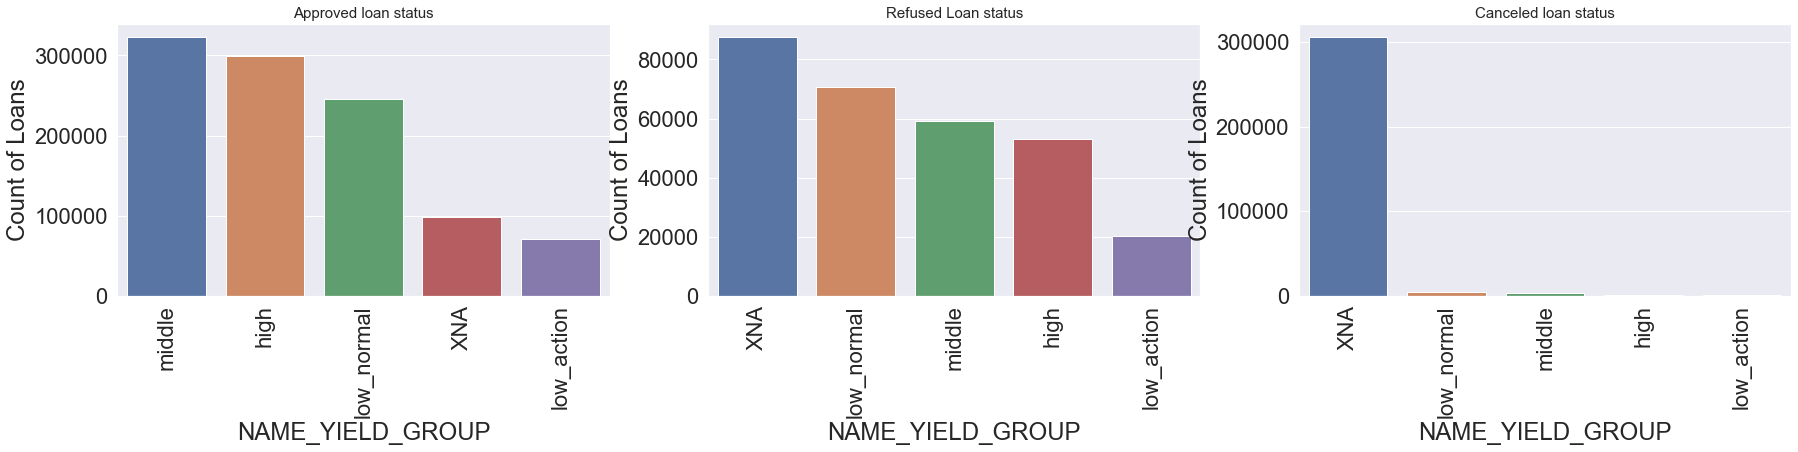

In [141]:
loan_status_chart('NAME_YIELD_GROUP', label_rotation=True,horizontal_layout=True)

We can see from above most approved yield group is middle and most refused and cancelled are from XNA or the unidentified group and low-normal yield followed by middle

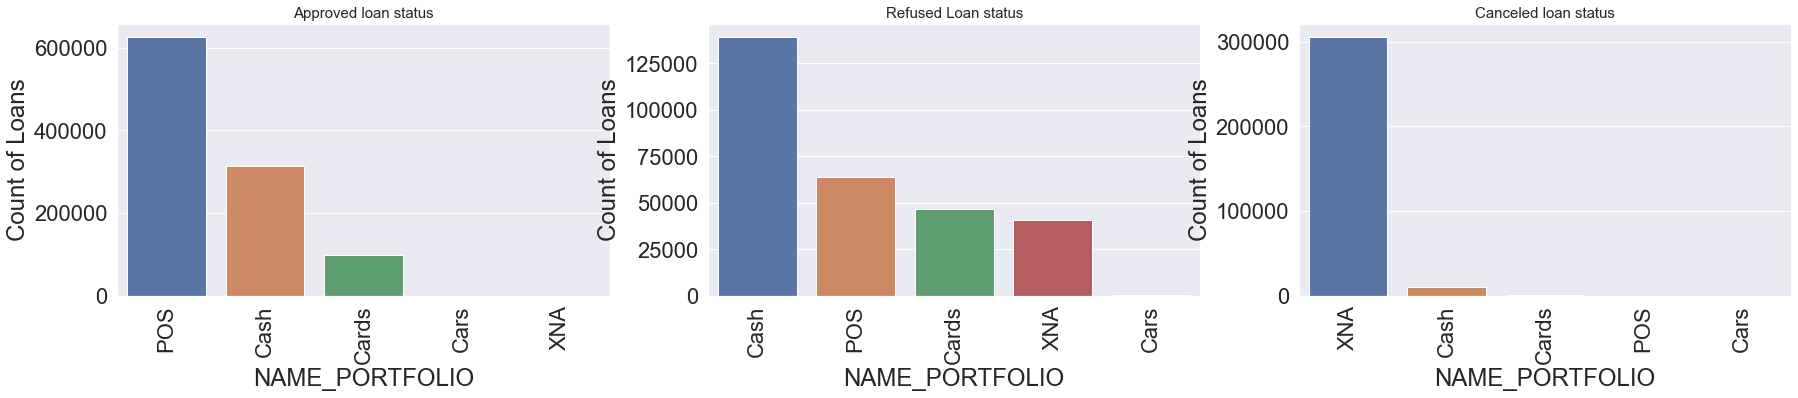

In [142]:
loan_status_chart('NAME_PORTFOLIO', label_rotation=True,horizontal_layout=True)

From above we can see the below:
Most approved loans were POS
Most refused loans were Cash and also for cancelled status  we can see XNA was on the higher side

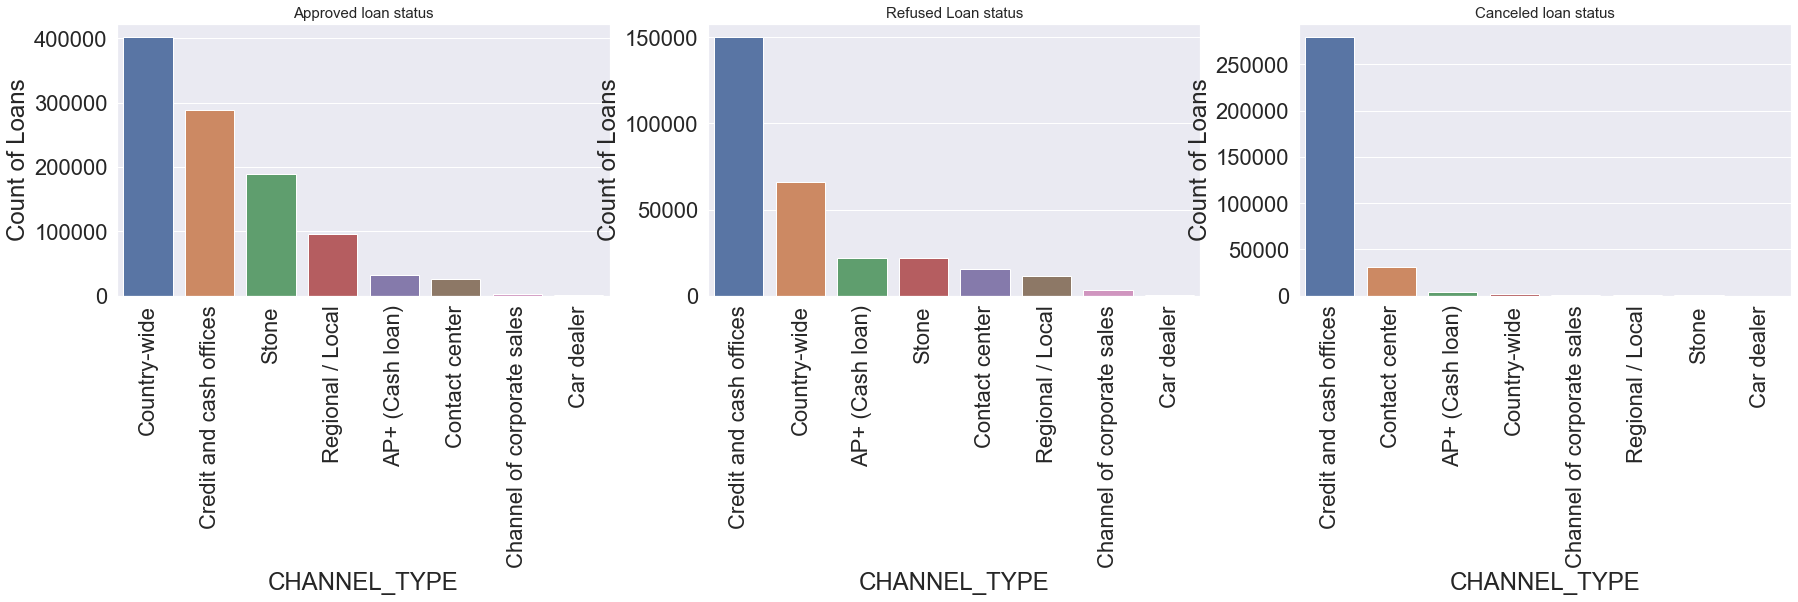

In [143]:
loan_status_chart('CHANNEL_TYPE', label_rotation=True,horizontal_layout=True)

From above  we can conclude:
    
Most approved loans were from Country-wide Channel
Most refused loans were from Credit and Cash Offices Channel

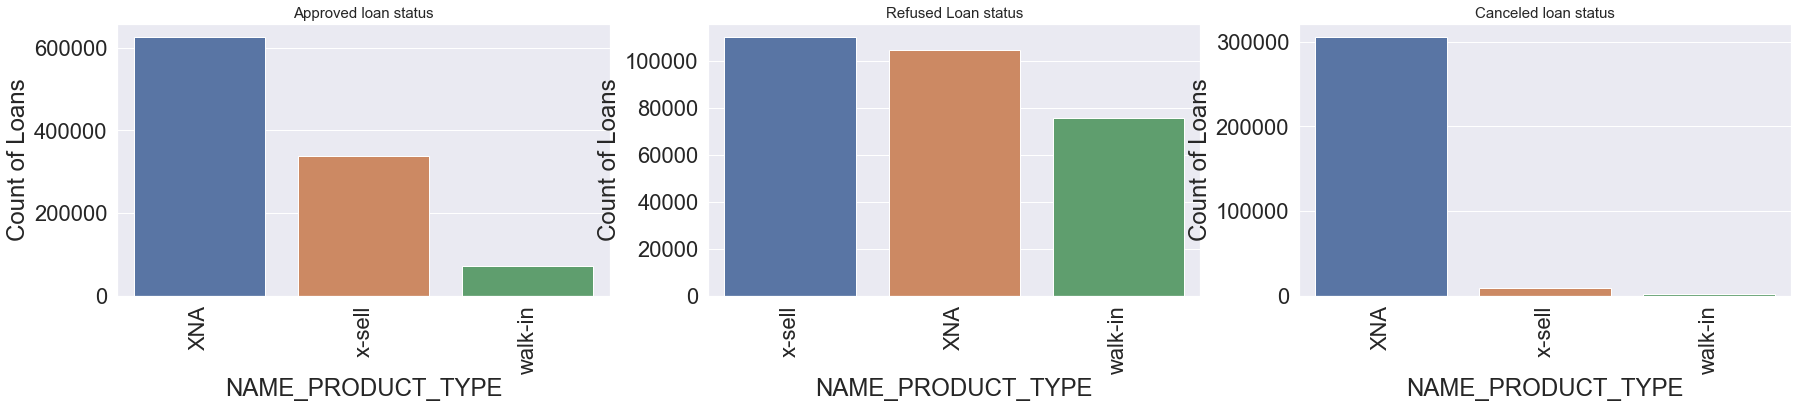

In [144]:
loan_status_chart('NAME_PRODUCT_TYPE', label_rotation=True,horizontal_layout=True)

For product type can see XNA Type and  x-sell having high approval status and can see x-sell to be the 
highest count for refused status 

In [145]:
prev_app_data.NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

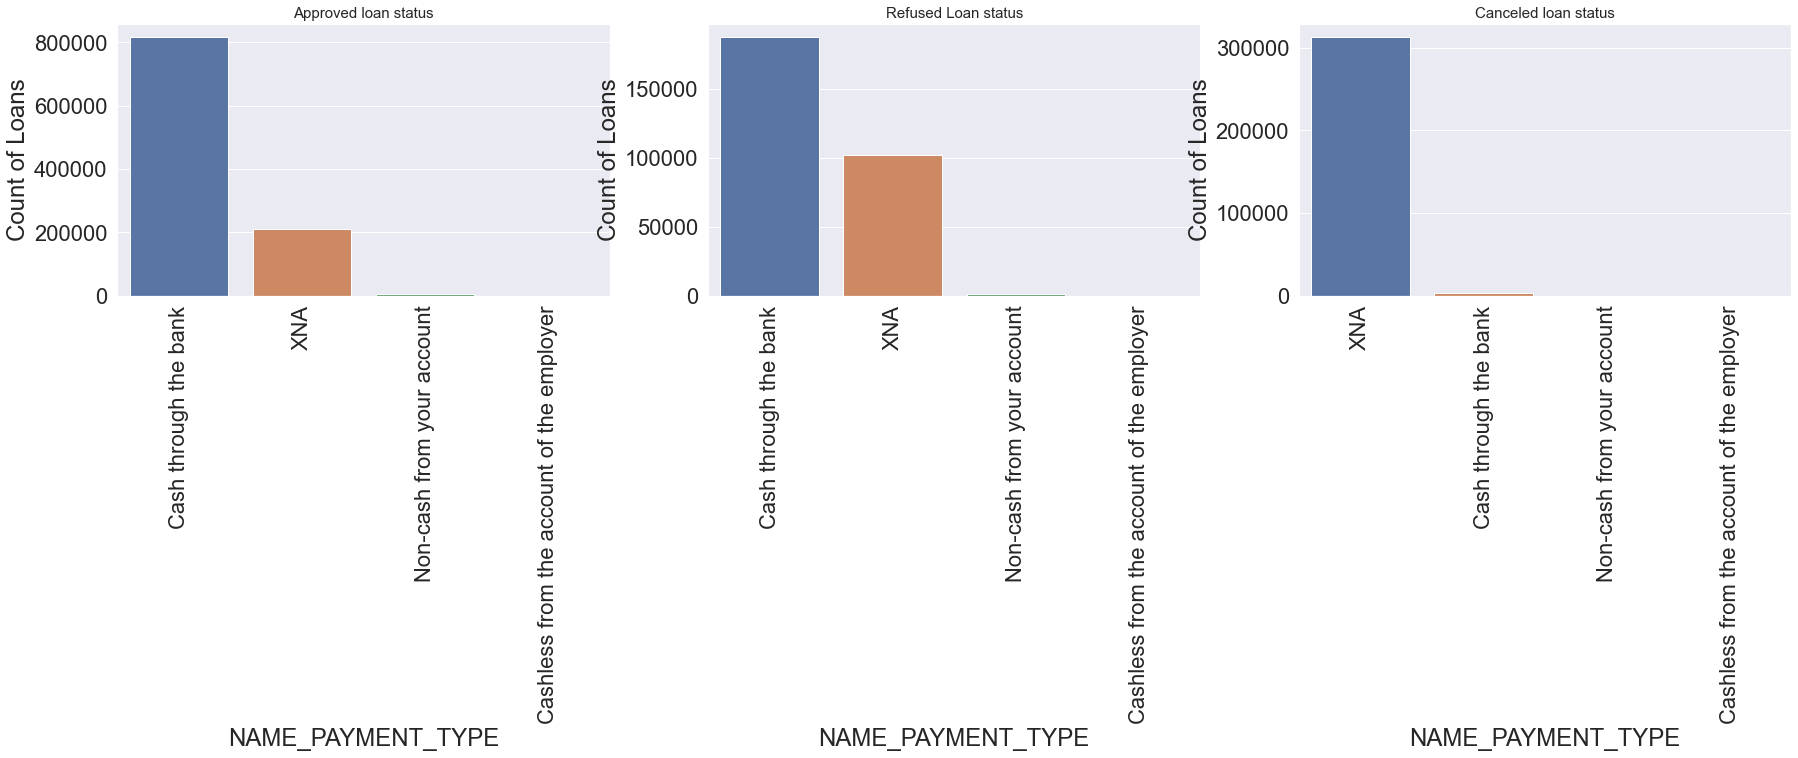

In [146]:
loan_status_chart('NAME_PAYMENT_TYPE', label_rotation=True,horizontal_layout=True)

We can see that for payment type cash through the bank has the highest count for approved and refused loan status 

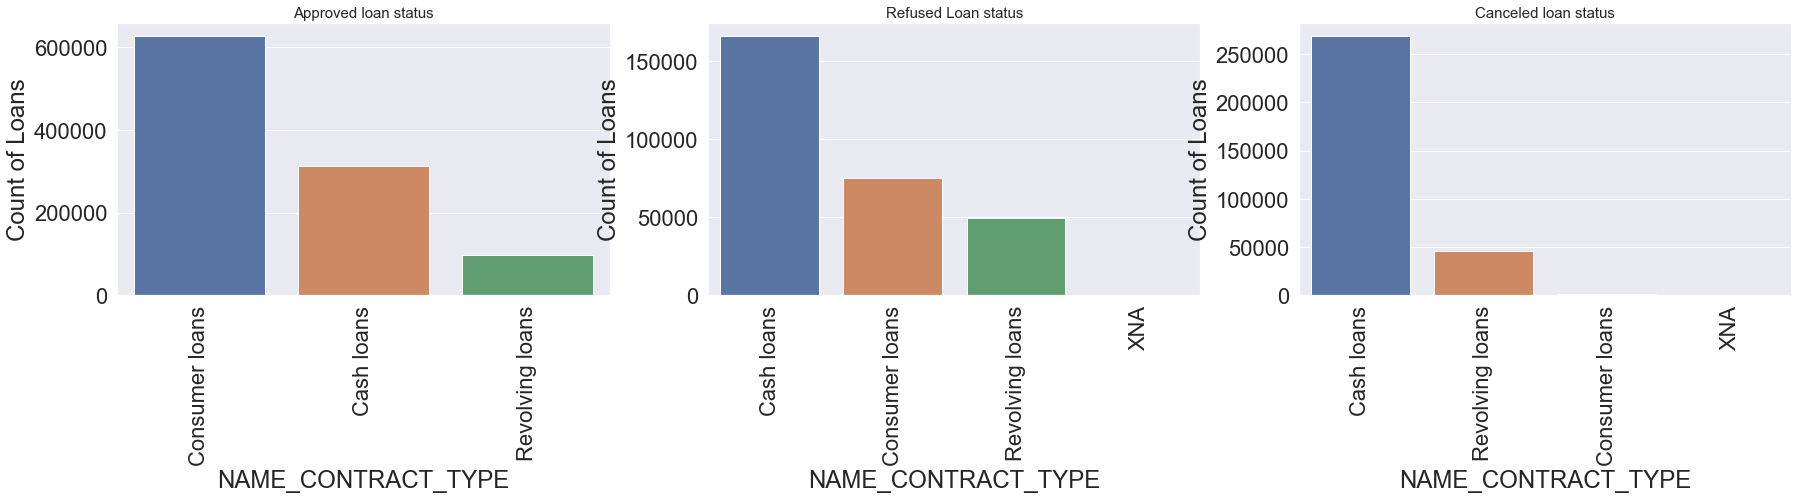

In [147]:
loan_status_chart('NAME_CONTRACT_TYPE', label_rotation=True,horizontal_layout=True)

From above we can see high approval status for consumer loans ,refused loan status high for cash loans and same case with cancelled

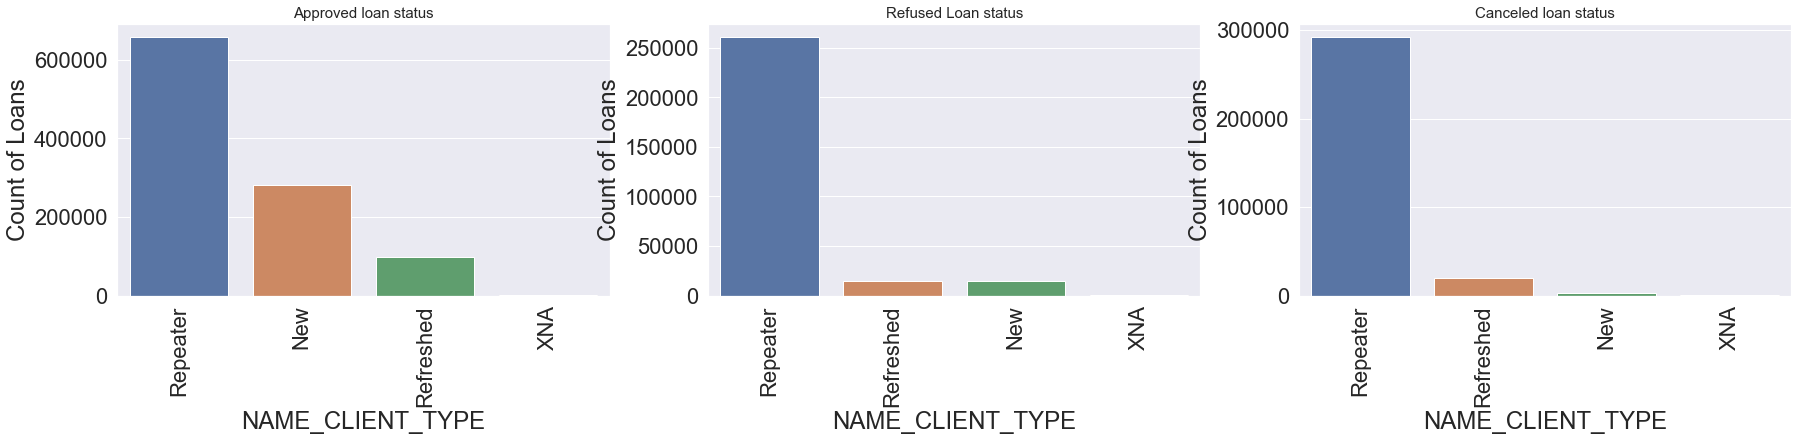

In [148]:
loan_status_chart('NAME_CLIENT_TYPE', label_rotation=True,horizontal_layout=True)

For client who is a repeater approve status is high also the same scenario in refused and cancelled status. 
Also new customers and refreshed also have percentage of getting loan approved 


In [149]:
#Removing outliers for approved status
approved.AMT_ANNUITY.quantile([0.99,1])


0.99     66734.460
1.00    393868.665
Name: AMT_ANNUITY, dtype: float64

We can remove the outliers above 99 percentile for approved status  

In [150]:
approved = approved[approved.AMT_ANNUITY < approved.AMT_ANNUITY.quantile(0.99)]

In [151]:
approved.AMT_ANNUITY.describe()

count    1.026340e+06
mean     1.399489e+04
std      1.161779e+04
min      0.000000e+00
25%      5.895349e+03
50%      1.027408e+04
75%      1.797237e+04
max      6.673275e+04
Name: AMT_ANNUITY, dtype: float64

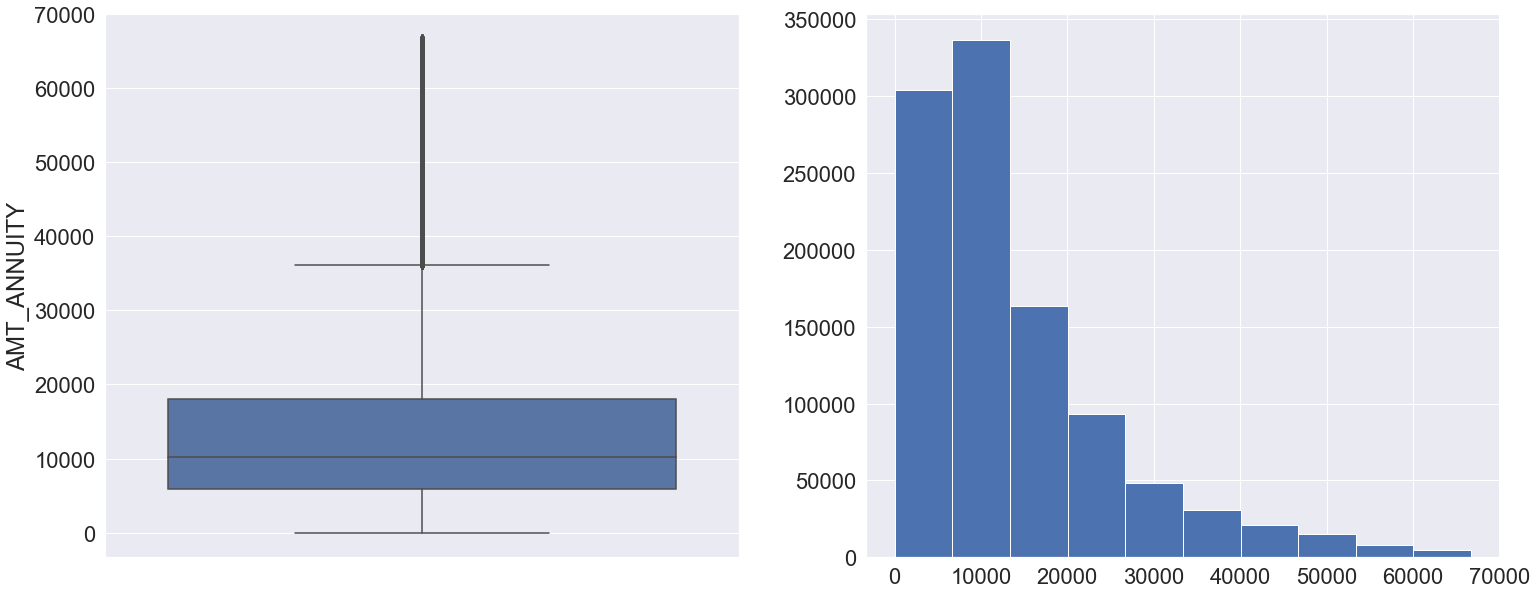

In [152]:
fig, ax = plt.subplots(figsize = (25, 10))
ax.set_title('AMT_ANNUITY boxplot on data within 99 percentile');
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_ANNUITY']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_ANNUITY'])
ax.set_title('AMT_ANNUITY')
plt.show()


We can see high count for approval for  amt_annuity range less than 20000 and also few  counts ranging upto 70k 

In [153]:
approved.AMT_CREDIT.quantile([0.99,1])

0.99    1293502.5
1.00    2540772.0
Name: AMT_CREDIT, dtype: float64

In [154]:
approved = approved[approved.AMT_CREDIT < approved.AMT_CREDIT.quantile(0.99)]

In [155]:
approved.AMT_CREDIT.describe()

count    1.015646e+06
mean     1.789663e+05
std      2.142876e+05
min      0.000000e+00
25%      4.725450e+04
50%      9.900000e+04
75%      2.114550e+05
max      1.293250e+06
Name: AMT_CREDIT, dtype: float64

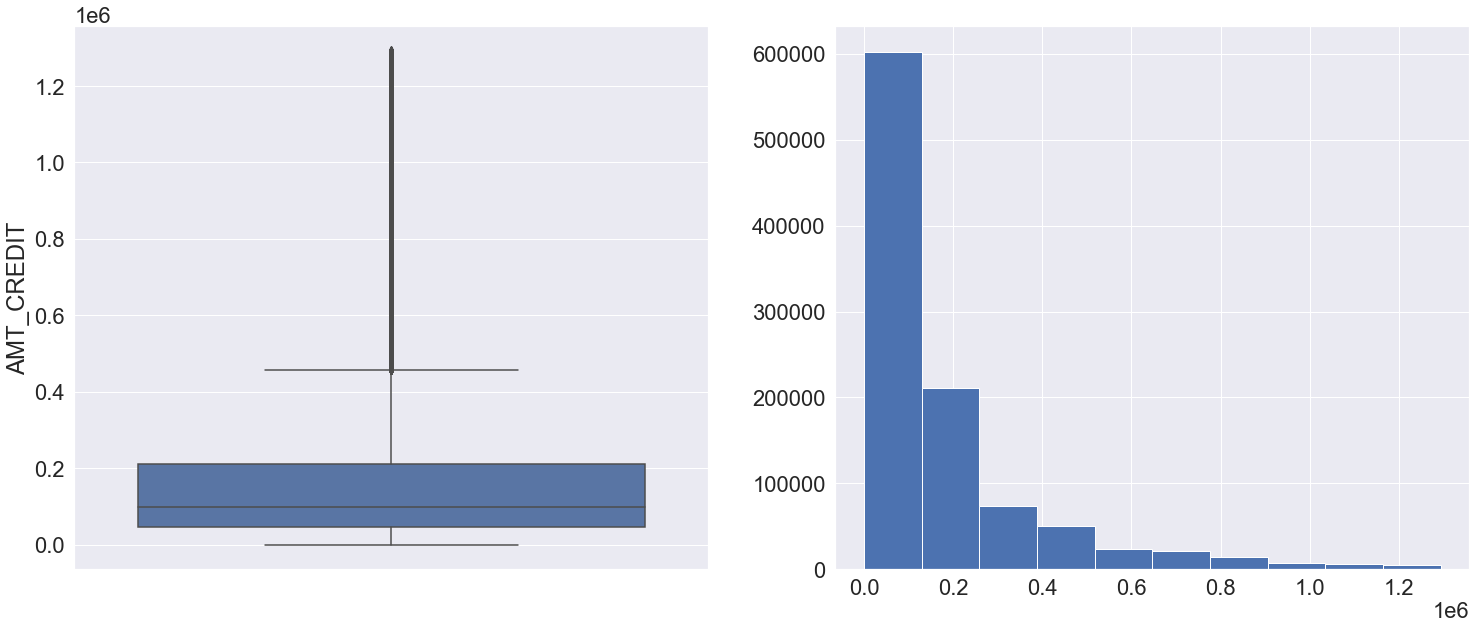

In [156]:
fig, ax = plt.subplots(figsize = (25, 10))
ax.set_title('AMT_CREDIT boxplot on data within 99 percentile');
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_CREDIT']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_CREDIT'])
ax.set_title('AMT_CREDIT')

plt.show()

We can see the approval status  is higher for lower amt_credit compared to the higher amt_credit

In [157]:
approved = approved[approved.AMT_GOODS_PRICE < approved.AMT_GOODS_PRICE.quantile(0.99)]

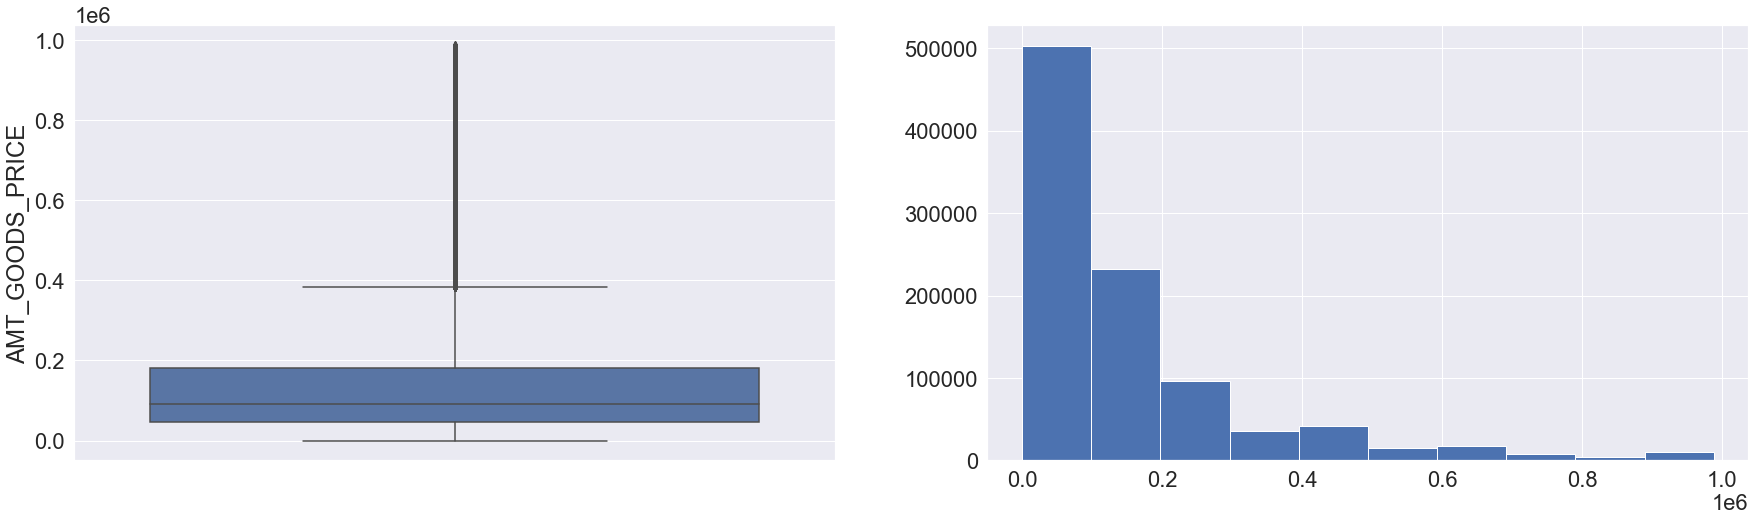

In [158]:
fig, ax = plt.subplots(figsize = (30, 8))
ax.set_title('AMT_GOODS_PRICE boxplot on data within 99 percentile');
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_GOODS_PRICE']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_GOODS_PRICE'])
ax.set_title('AMT_GOODS_PRICE')
plt.show()

## BIVARIATE ANALYSIS OF VARIABLES

We will find out the  correlation of different attributes for approved and refused status loans .

In [160]:


approved.dtypes.value_counts()

object     18
float64    12
int64       5
dtype: int64

In [161]:
approved.select_dtypes('float64').columns

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT', 'AMT_CREDIT', 'AMT_APPLICATION'], dtype='object')

In [162]:
approved_cols=['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT', 'AMT_CREDIT', 'DAYS_DECISION', 'AMT_APPLICATION']
approved_num=approved[approved_cols]

In [163]:
refused_cols=['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT', 'AMT_CREDIT', 'DAYS_DECISION', 'AMT_APPLICATION']
refused_num=refused[refused_cols]

In [164]:
#calculating correlation for approved
approved_correlation = approved_num.corr()
round(approved_correlation, 3)

AMT_DOWN_PAYMENT  RATE_DOWN_PAYMENT  DAYS_TERMINATION  DAYS_LAST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DUE  DAYS_FIRST_DRAWING  AMT_GOODS_PRICE  AMT_ANNUITY  CNT_PAYMENT  AMT_CREDIT  DAYS_DECISION  AMT_APPLICATION
AMT_DOWN_PAYMENT                      1.000              0.662            -0.043         -0.044                     -0.001          -0.017              -0.003            0.333        0.266       -0.072       0.169         -0.029            0.333
RATE_DOWN_PAYMENT                     0.662              1.000            -0.146         -0.148                     -0.011          -0.039              -0.008           -0.118       -0.117       -0.296      -0.244         -0.205           -0.118
DAYS_TERMINATION                     -0.043             -0.146             1.000          0.967                      0.433           0.332              -0.332            0.228        0.066        0.119       0.230          0.483            0.228
DAYS_LAST_DUE                        -0.044             -0.148             0.967          1.000                      0.440           0.384              -0.295            0.231        0.067        0.120       0.233          0.484            0.231
DAYS_LAST_DUE_1ST_VERSION            -0.001             -0.011             0.433          0.440                      1.000           0.570              -0.756            0.064       -0.077       -0.311       0.048          0.232            0.064
DAYS_FIRST_DUE                       -0.017             -0.039             0.332          0.384                      0.570           1.000              -0.033           -0.002       -0.075       -0.188      -0.010          0.210           -0.002
DAYS_FIRST_DRAWING                   -0.003             -0.008            -0.332         -0.295                     -0.756          -0.033               1.000           -0.068        0.042        0.240      -0.055         -0.160           -0.068
AMT_GOODS_PRICE                       0.333             -0.118             0.228          0.231                      0.064          -0.002              -0.068            1.000        0.823        0.613       0.990          0.276            1.000
AMT_ANNUITY                           0.266             -0.117             0.066          0.067                     -0.077          -0.075               0.042            0.823        1.000        0.312       0.813          0.245            0.823
CNT_PAYMENT                          -0.072             -0.296             0.119          0.120                     -0.311          -0.188               0.240            0.613        0.312        1.000       0.656          0.149            0.613
AMT_CREDIT                            0.169             -0.244             0.230          0.233                      0.048          -0.010              -0.055            0.990        0.813        0.656       1.000          0.282            0.990
DAYS_DECISION                        -0.029             -0.205             0.483          0.484                      0.232           0.210              -0.160            0.276        0.245        0.149       0.282          1.000            0.276
AMT_APPLICATION                       0.333             -0.118             0.228          0.231                      0.064          -0.002              -0.068            1.000        0.823        0.613       0.990          0.276            1.000

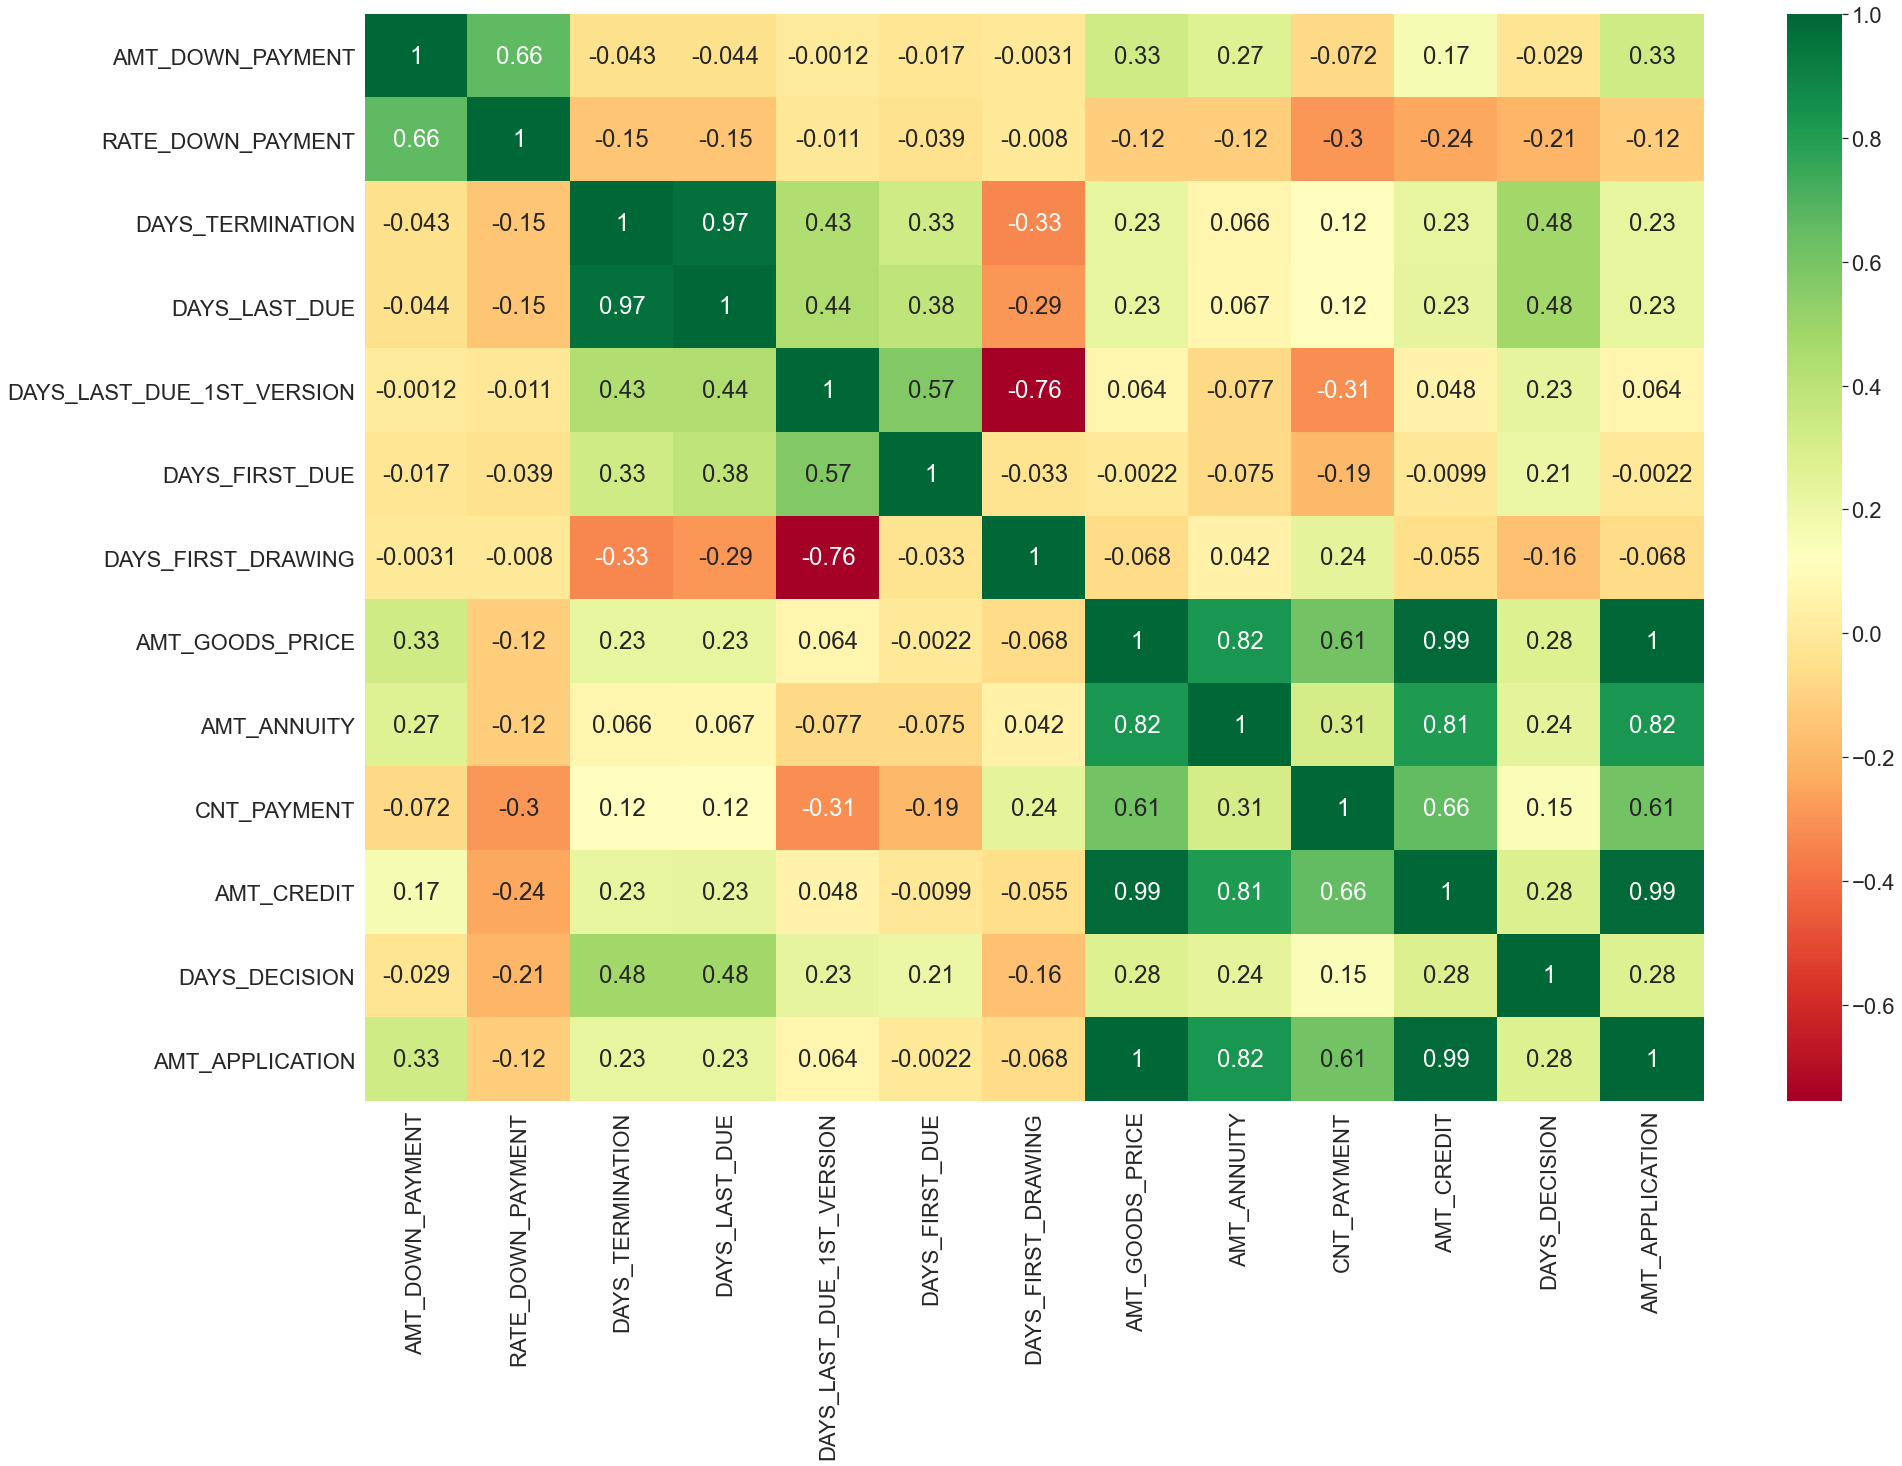

In [165]:
# figure size
plt.figure(figsize=(30,20))

# heatmap

sns.set(font_scale=2.0)
sns.heatmap(approved_correlation, cmap="RdYlGn", annot=True)
plt.show()

For approved status top 5 attributes having positive correlation are :
    
1.)Amt_CREDIT with AMT_APPLICATION
2.)AMT_CREDIT with AMT_GOODS_PRICE
3.)AMT_APPLICATION with AMT_ANNUITY
4.)DAYS_TERMINATION with DAYS_LAST_DUE
5.)AMT_DOWN_PAYMENT with RATE_DOWN_PAYMENT

For approved status top 5 attributes having negative correlation are :
1.) DAYS_FIRST_DRAWING with DAYS_LAST_DUE_1ST_VERSION
2.) DAYS_FIRST_DRAWING with DAYS_TERMINATION
3.) DAYS_FIRST_DRAWING with DAYS_LAST_DUE
4.) CNT_PAYMENT with DAYS_LAST_DUE_1ST_VERSION
5.) CNT_PAYMENT with RATE_DOWN_PAYMENT
 


In [166]:
#calculating correlation for refused
refused_correlation = refused_num.corr()
round(refused_correlation, 3)

AMT_DOWN_PAYMENT  RATE_DOWN_PAYMENT  AMT_GOODS_PRICE  AMT_ANNUITY  CNT_PAYMENT  AMT_CREDIT  DAYS_DECISION  AMT_APPLICATION
AMT_DOWN_PAYMENT              1.000              0.416            0.536        0.317        0.095       0.386          0.008            0.536
RATE_DOWN_PAYMENT             0.416              1.000           -0.024       -0.084       -0.242      -0.112         -0.225           -0.024
AMT_GOODS_PRICE               0.536             -0.024            1.000        0.823        0.658       0.992          0.334            1.000
AMT_ANNUITY                   0.317             -0.084            0.823        1.000        0.427       0.820          0.287            0.818
CNT_PAYMENT                   0.095             -0.242            0.658        0.427        1.000       0.677          0.306            0.670
AMT_CREDIT                    0.386             -0.112            0.992        0.820        0.677       1.000          0.270            0.984
DAYS_DECISION                 0.008             -0.225            0.334        0.287        0.306       0.270          1.000            0.265
AMT_APPLICATION               0.536             -0.024            1.000        0.818        0.670       0.984          0.265            1.000

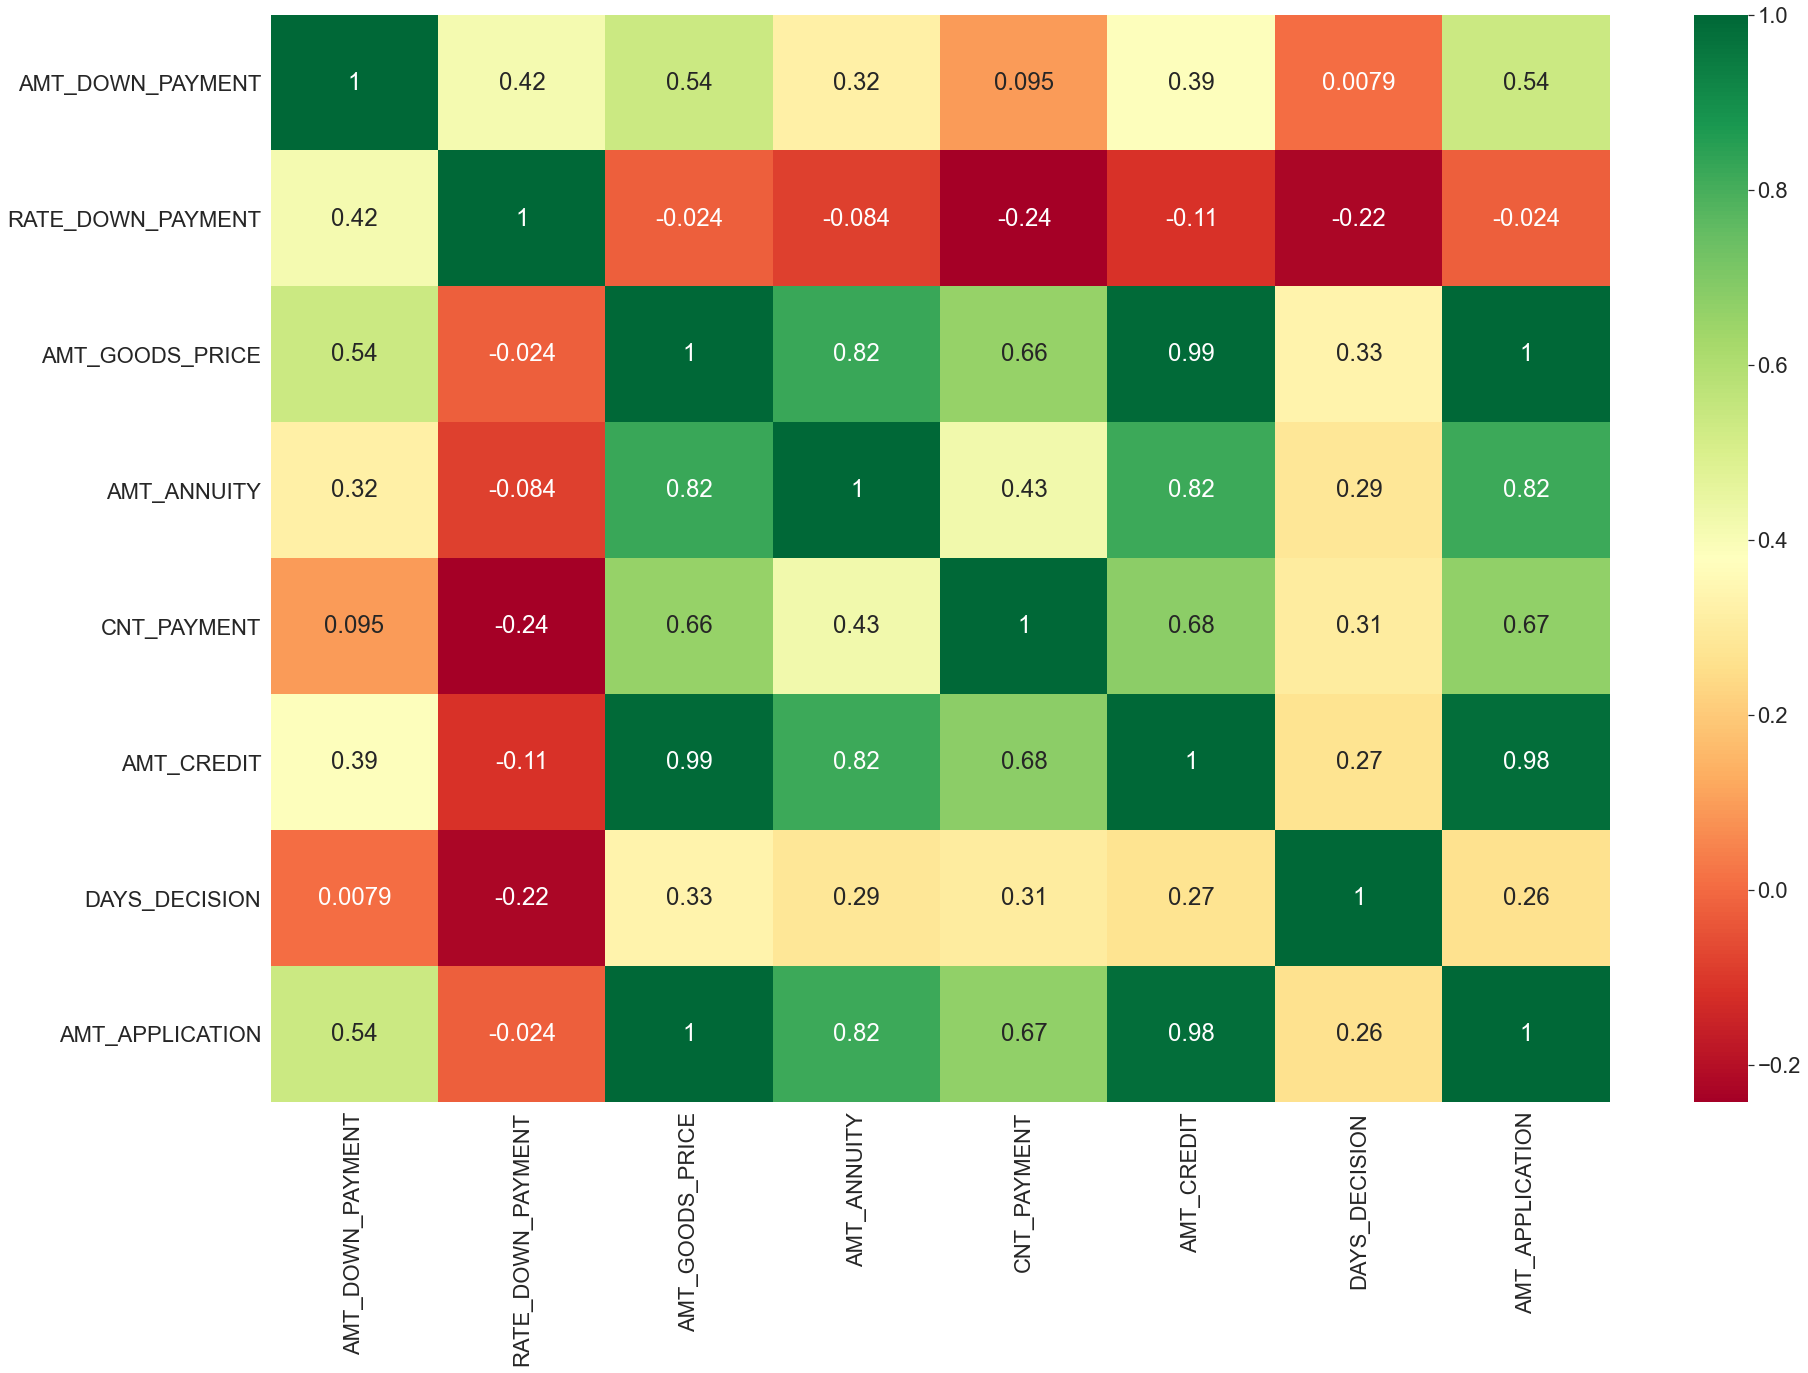

In [167]:
# figure size
plt.figure(figsize=(30,20))

# heatmap

sns.set(font_scale=2.0)
sns.heatmap(refused_correlation, cmap="RdYlGn", annot=True)
plt.show()

For refused  status top 3 attributes having positive correlation are :
    
 1.)AMT_APPLICATION with AMT_GOODS_PRICE
 2.) AMT_APPLICATION with AMT_CREDIT
 3.)AMT_APPLICATION with AMT_ANNUITY
 
 For refused  status top 3 attributes having negative correlation are :
 
 1.) CNT_PAYMENT with RATE_DOWN_PAYMENT
 2.) DAYS_DECISION with RATE_DOWN_PAYMENT
 3.) AMT_CREDIT with RATE_DOWN_PAYMENT
 

In [168]:
approved['DAYS_TERMINATION'].apply(lambda x:'Loan Terminated' if x < 0 else 'Loan Open')

0          Loan Terminated
1                Loan Open
2                Loan Open
3          Loan Terminated
5          Loan Terminated
                ...       
1670209    Loan Terminated
1670210    Loan Terminated
1670211    Loan Terminated
1670212    Loan Terminated
1670213    Loan Terminated
Name: DAYS_TERMINATION, Length: 963027, dtype: object

In [169]:
approved['CURRENT_STATUS'] =approved['DAYS_TERMINATION'].apply(lambda x:'Loan Terminated' if x < 0 else 'Loan Open')

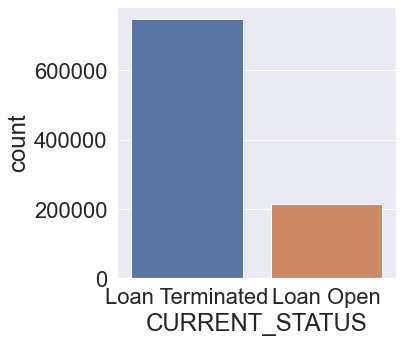

In [170]:
plt.figure(figsize=(5,5))
sns.countplot(x=approved['CURRENT_STATUS'], data=approved)
plt.show()

From above we can see high count for loan terminated compared to the loan which are open

In [ ]:
#we will find out count of the contract status for different loan id  which is refused 

In [171]:
df = prev_app_data.pivot_table(values = 'NAME_CONTRACT_STATUS', index = 'SK_ID_CURR', aggfunc = 'count')

In [172]:
df = df.reset_index(drop=False)

In [173]:

df.rename(columns = {'NAME_CONTRACT_STATUS':'Count of Refused Loans'}, inplace = True)

In [174]:
df 

SK_ID_CURR  Count of Refused Loans
0           100001                       1
1           100002                       1
2           100003                       3
3           100004                       1
4           100005                       2
...            ...                     ...
338852      456251                       1
338853      456252                       1
338854      456253                       2
338855      456254                       2
338856      456255                       8

[338857 rows x 2 columns]

In [175]:
#now merging this count will help us analyse the refusal status with the two  target status 
# of different loan id with application data 



merged_df1=pd.merge(df, pd.DataFrame(app_data[['SK_ID_CURR','TARGET']]), how='inner', on='SK_ID_CURR')

In [176]:
merged_df1

SK_ID_CURR  Count of Refused Loans  TARGET
0           100002                       1       1
1           100003                       3       0
2           100004                       1       0
3           100006                       9       0
4           100007                       6       0
...            ...                     ...     ...
232402      456248                       4       0
232403      456251                       1       0
232404      456253                       2       0
232405      456254                       2       1
232406      456255                       8       0

[232407 rows x 3 columns]

In [177]:
merged_df1[merged_df1['TARGET']==0]

SK_ID_CURR  Count of Refused Loans  TARGET
1           100003                       3       0
2           100004                       1       0
3           100006                       9       0
4           100007                       6       0
5           100008                       5       0
...            ...                     ...     ...
232401      456247                       5       0
232402      456248                       4       0
232403      456251                       1       0
232404      456253                       2       0
232406      456255                       8       0

[211695 rows x 3 columns]

In [178]:
merged_df1[merged_df1['TARGET']==1]

SK_ID_CURR  Count of Refused Loans  TARGET
0           100002                       1       1
34          100047                       6       1
36          100049                       5       1
74          100112                       4       1
85          100130                       2       1
...            ...                     ...     ...
232355      456186                       6       1
232378      456215                      11       1
232384      456225                       5       1
232388      456233                       2       1
232405      456254                       2       1

[20712 rows x 3 columns]